<a id="contents"></a>

<center style ="font-size: xx-large; font-weight: 600; line-height: 1.1;">
Advanced Statistics Homework 6
</center>  
<center>
Jake Jackson - 2046805 
</center>

## Contents 
  
* [Exercise 1: Blood disease detection](#ex1)   
* [Exercise 2: Poission horse death kick](#ex2)
* [Exercise 3: Water quality of streams](#ex3)

### MCMC with JAGS 
* [Exercise 4: Blood disease detection](#ex4)
* [Exercise 5: Poission horse death kick](#ex5)
* [Exercise 6: Water quality of streams](#ex6)

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex1"></a> 

## Exercise 1: Blood disease detection

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15 $\%$ of the patients that actually have the disease. 

A young UniPD start Up has developed an innovative method of screening.During the qualification phase, a random sample of $n=75$ patients known to have the disease is screened using the new method. 

* What is the probability distribution of **y,the number of times the new method fails** to detect the disease? 
* on the $n=75$ patients sample, the new method fails to detect the disease in $y=6$ cases. What is the frequentist estimator of the failure probability of the new method? 
* set up a **bayesian computation** of the posterior probability,assuming a beta distribution with mean  value 0.15 and standard deviation 0.14. Plot the posterior distribution for y,and mark on the plot the mean value and variance 
* Perform a **test of hypothesis** assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%,the new test is no better that the traditional method. Test he sample at a $5\%$ level of significance in the Bayesian way.  
* Perform the same hypothesis test in the classical frequentist way.

This is a Bernoulli process in that there are only two possible outcomes new method fails or not. Since we are looking at the sum of indepndent Bernoulli trials I would assume a Binomial distribution for y.

$$P(y \mid p, n, M)=\left(\begin{array}{l}
n \\
y
\end{array}\right) \pi^{y}(1-\pi)^{n-y} \quad \text { with } \quad y \leq n$$


### Frequentist estimator

In [1]:
n <- 75
y <- 6

fails_given_disease <- 0.15 

f_P_fail <- y/n
cat("Frequentist failure probablity estimator = ", f_P_fail)

Frequentist failure probablity estimator =  0.08

### Bayesian Computation

Beta prior , $X ∼ Beta(\alpha ,\beta)$  
Binomial likelihood  
Estimating the Beta prior input parameters

\begin{aligned}
&\alpha=\left(\frac{E[X](1-E[X])}{V[X]}-1\right) E[X] \\
&\beta=\left(\frac{E[X](1-E[X])}{V[X]}-1\right)(1-E[X])
\end{aligned}

### Notes 

#### 
Bayesian approach 
* the posterior distribution of the parameter, given the data, constraints our entire belief after getting the data 
* but since the probability of an exact value represented by the point null hypothesis is zero Ü needacorrespondence similar to that of confidence intervals, using credible intervals 
* wecompute a (1−α)×100% credible interval for p 
* if p◦ lies inside the interval, we do not reject the null hypothesis, H◦; if it is outside, we reject H◦

Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is **greater or equal than 15%**,the new test is no better that the traditional method. Test he sample at a  5%  level of significance in the **Bayesian way.**

Estimation of input parameters: alpha =  0.8257653 , beta =  4.679337 
Posterior mean =  0.08478674 ,  varience =  0.007122518

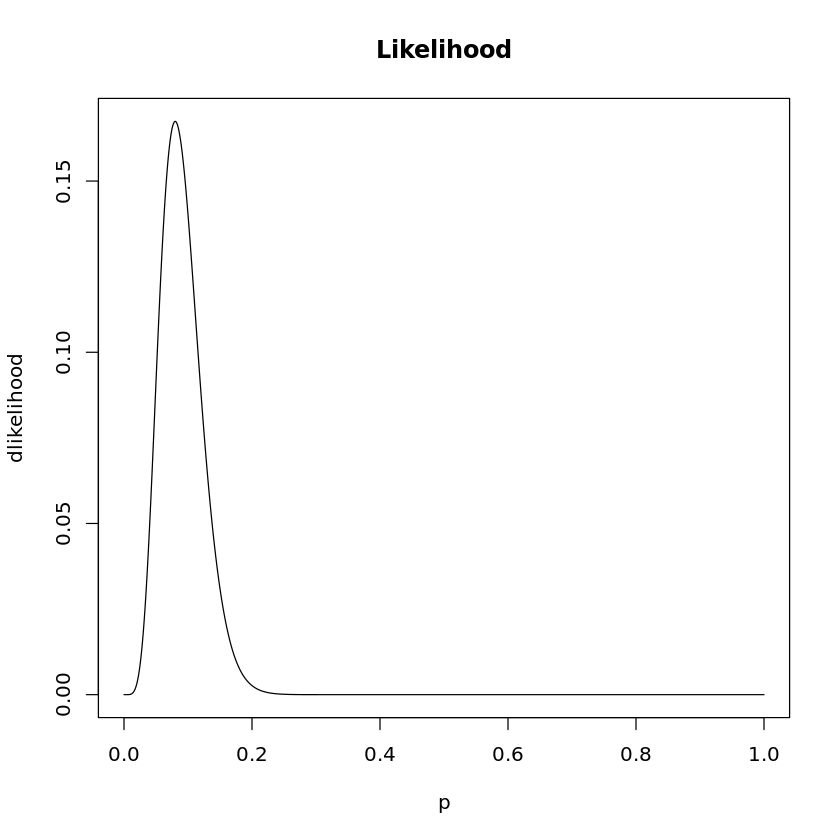

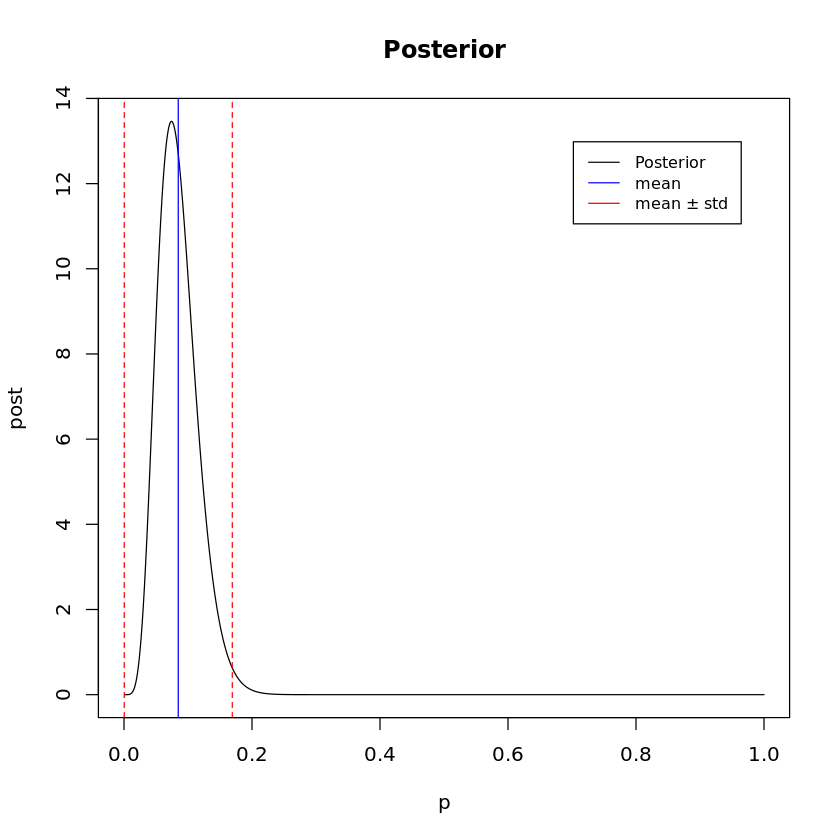

In [2]:
E <- 0.15
std<- 0.14
V<- std^2


### Use standard formulas to get alpha and beta 
alpha_est<- function(E, V){#integrateable now 
    ((E*(1-E)/V)-1)*E
}
beta_est<- function(E, V){#integrateable now 
    ((E*(1-E)/V)-1)*(1-E)
}

alpha<- alpha_est(E,V)
beta <- beta_est(E,V)
cat("Estimation of input parameters: alpha = ", alpha, ", beta = ", beta, "\n")
###############################################

dp <- 0.001 
p <- seq(0, 1, dp)

dprior <- dbeta(p, alpha, beta)

#y is number of failures here
dlikelihood <- dbinom(y, n, p)

post_f <-function (p){
    dbinom(y, n, p)*dbeta(p, alpha, beta)
}

norm_post_f <-function (p){
    post_f(p)/Z
}


Z <- integrate(post_f, 0, 1)$value
post_unorm <- post_f(p)
post <- post_unorm/Z

expectation <- function(pdf, min, max){# wrote a genral expectation function to be used later
    xpdf <- function(x){x*pdf(x)}
    E <- integrate(xpdf, lower = min, upper = max)
    return(E)    
}
expectation_sq <- function(pdf, min, max){# wrote a genral expectation function to be used later
    xpdf <- function(x){x*x*pdf(x)}
    E <- integrate(xpdf, lower = min, upper = max)
    return(E)    
}



mean=expectation(norm_post_f, 0, 1)$value
var =expectation(norm_post_f, 0, 1)$value^2-expectation_sq(norm_post_f, 0, 1)$value^2

cat("Posterior mean = ", mean, ",  varience = ", var)

plot(p, dlikelihood, type="l", main = "Likelihood")
plot(p, post, type="l", main ="Posterior" )


abline(v=mean,  col= "blue")
abline(v=mean -var^0.5, col= "red", lty=2)
abline(v=mean +var^0.5, col= "red", lty=2)
legend("topright", 
       inset=0.07, 
       legend=c("Posterior", "mean", "mean ± std"),
       col=c("black","blue","red"), 
       lty=1:1, 
       cex=0.8,
       box.lty=1)    


### Bayesian test of hypothesis
Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than $15\%$ , the new test is no better that the traditional method.  
Test the sample at a $5\%$ level of significance in the Bayesian way.


In [3]:
alpha <-0.05 
P_null <- 0.15

bay_Htest <- function(funct, alpha, P_null){
    posterior_P <- integrate(funct, lower =0, upper= P_null)$value
    print("In bayesian reject null hypothesis if the posterior probability < α")#L7 pg17

    if (posterior_P < alpha){
        cat("Accept null H at this alpha: posterior probability  =", posterior_P, "< ", "alpha", alpha)
    }
    if (posterior_P > alpha){
        cat("Cannot reject null H at this alpha: posterior probability  =", posterior_P, ">", "alpha", alpha)
    }
}


bay_Htest(norm_post_f, alpha, P_null)

[1] "In bayesian reject null hypothesis if the posterior probability < α"
Cannot reject null H at this alpha: posterior probability  = 0.1310994 > alpha 0.05

### Frequentist test of hypothesis
* setup a null hypothesis $H_0$ : p =0.5 
* we want to test it against the alternative hypothesis H1 : p ,0.5 3- the null distribution is the sampling distribution of y: Bin(y n = 75,p = 0.5)

For y =  6 
Accept null hypothesis: p_value =  0.97658 >  alpha =  0.05

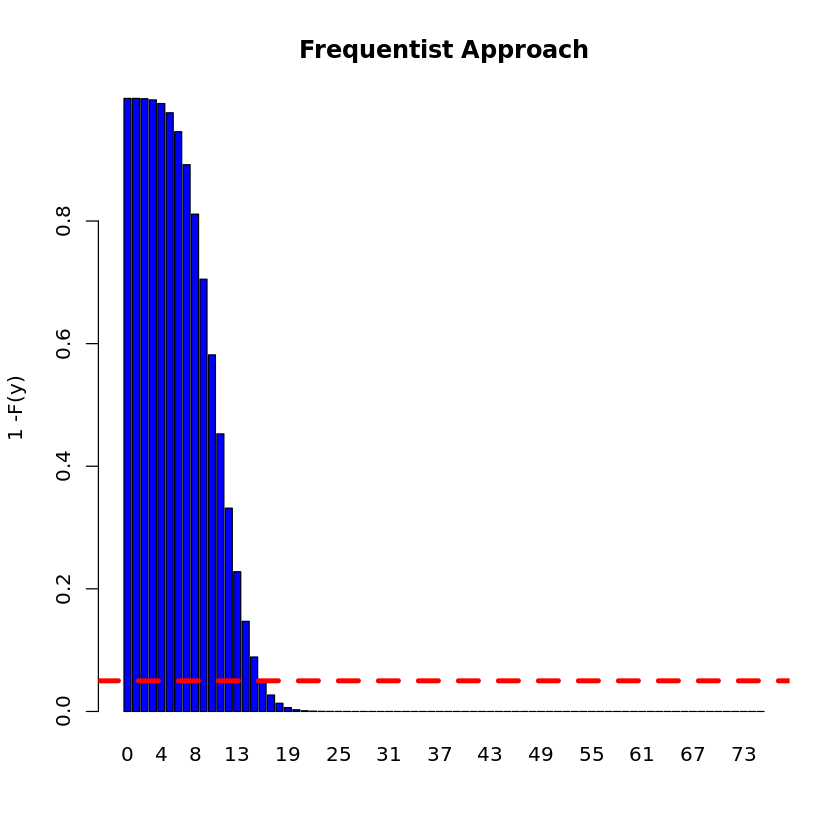

In [5]:
alpha <- 0.05

freq_Htest_binom <- function(y, n, alpha, P_null){
    y_range<-seq(0,n,1)
    
    F<-pbinom(q=y_range,size =n, prob=P_null)
    p_value <- 1 - F[y]

    barplot(1-F, ylab ="1 -F(y)", names= y_range, col ="blue", main = "Frequentist Approach")
    abline(h = alpha, col="red", lwd = 4, lty=2)
    cat("For y = ", y, "\n")
    if (p_value < alpha){
        cat("Reject null hypothesis: p_value = ", p_value, "<  alpha = ", alpha)
    }
    if (p_value > alpha){
        cat("Accept null hypothesis: p_value = ", p_value, ">  alpha = ", alpha)
    }
}

freq_Htest_binom(y = 6, n=75, alpha = 0.05, P_null =0.15)

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex2"></a>

## Exercise 2: Poisson horse death kick

* Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution. 

* Considering the following two sets of observations taken over a fixed large time interval in two different corps:



| $y$ death soldiers | 0   | 1  | 2  | 3  | 4 | $\geq5$ |
|--------------------|-----|----|----|----|---|----------|
| $n_1$ observations | 109 | 65 | 22 | 3  | 1 | 0        |
| $n_1$ observations | 144 | 91 | 32 | 11 | 2 | 0        |


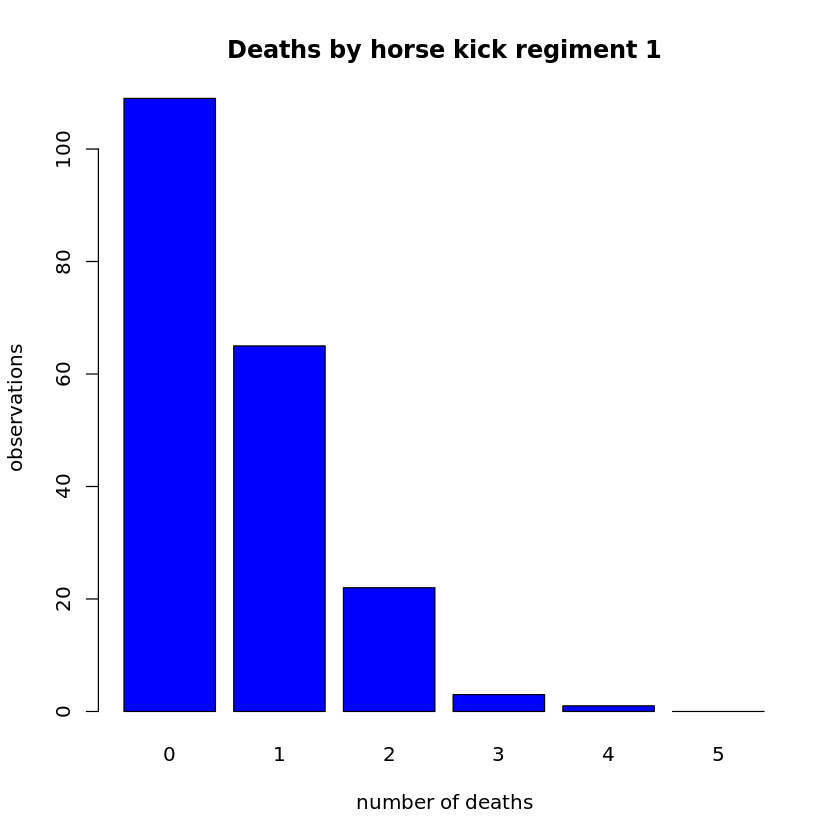

In [6]:
lambda <- seq(0.001, 5, 0.001) # y deaths are in fixed unit of time
y_death <- seq(0, 5, 1)

n1 <- c(109, 65, 22, 3,  1, 0)
n2 <- c(144, 91, 32, 11, 2, 0)
n <- length(n1)
# Visulaising the data (famous case)
barplot(n1, names= y_death, xlab ="number of deaths", ylab= "observations", main = "Deaths by horse kick regiment 1", col ="Blue")

Posterior mean n1 =  28.71429 
Posterior mean n2 =  40.14286 
For n1 
The  95 %  credible interval is between 25.468  and  32.126 
For n2 
The  95 %  credible interval is between 36.288  and  44.163 


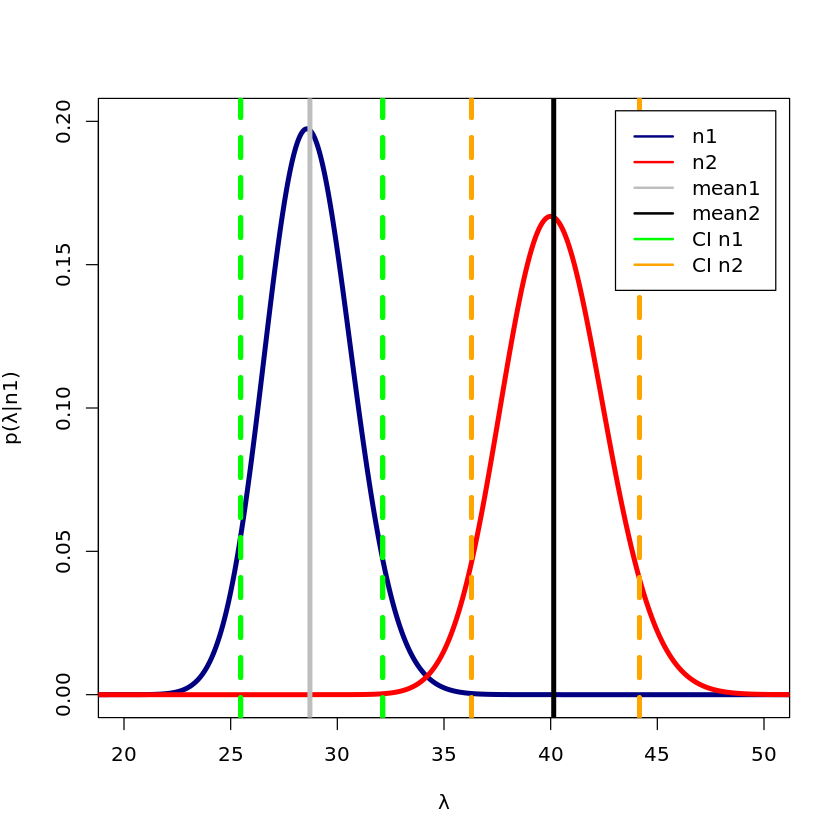

In [8]:
alpha <- 1
beta <- 1

dl <- 0.01
lambda <- seq(0,60, dl) 

postl_f1 <- function(l){
    dgamma(l, alpha + sum(n1), beta + n)
}

postl_f2 <- function(l){
    dgamma(l, alpha + sum(n2), beta + n)
}

mean1 = expectation(postl_f1, 0, Inf)$value 
cat("Posterior mean n1 = ", mean1 , "\n")

mean2 = expectation(postl_f2, 0, Inf)$value 
cat("Posterior mean n2 = ", mean2, "\n")

qfunct <- function(funct, p){#made generic will be used later
    area <- 0
    i <- 0.001
    while(area < p){
        area <- integrate(funct, lower = 0, upper = i)$value
        i <- i + 0.001
    }
    return(i)
}

get_CI <- function(funct, p){#
    low  <- qfunct(funct, p)
    high <- qfunct(funct, 1-p)
    intervals <- sort(c(low, high))
    cat("The ", p*100, "%  credible interval is between", intervals[1], " and ", intervals[2] ,"\n")
    return(intervals)
}
cat("For n1 \n")
CI_1 <- get_CI(postl_f1, 0.95)
cat("For n2 \n")
CI_2 <- get_CI(postl_f2, 0.95)

plot(lambda, dgamma(lambda, alpha + sum(n1), beta + n), 
     type = 'l', lwd = 4, col = 'navy',
     xlab = expression(lambda), 
     ylab = expression(paste('p(', lambda, '|n1)')),
     ylim = c(0, 0.2),
     xlim = c(20,50))

lines(lambda, dgamma(lambda, alpha + sum(n2), beta + n), 
      type = 'l', lwd = 4, col = 'red')


abline(v = mean1, , lwd = 4 ,col ="grey")
abline(v = mean2, , lwd = 4)
abline(v = CI_1, , lwd = 4, col = "green", lty=2)
abline(v = CI_1, , lwd = 4, col = "green", lty=2)
abline(v = CI_2, , lwd = 4, col = "orange", lty=2)
abline(v = CI_2, , lwd = 4, col = "orange", lty=2)


legend('topright', inset = .02, legend = c('n1', 'n2', 'mean1', "mean2","CI n1", "CI n2"),
       col = c('navy', 'red', 'grey','black', 'green', 'orange'), lwd = 2)

### Jefferys prior

Posterior mean n1 =  28.64286 
Posterior mean n2 =  40.07143 
For n1 
The  95 %  credible interval is between 25.4  and  32.051 
For n2 
The  95 %  credible interval is between 36.22  and  44.088 


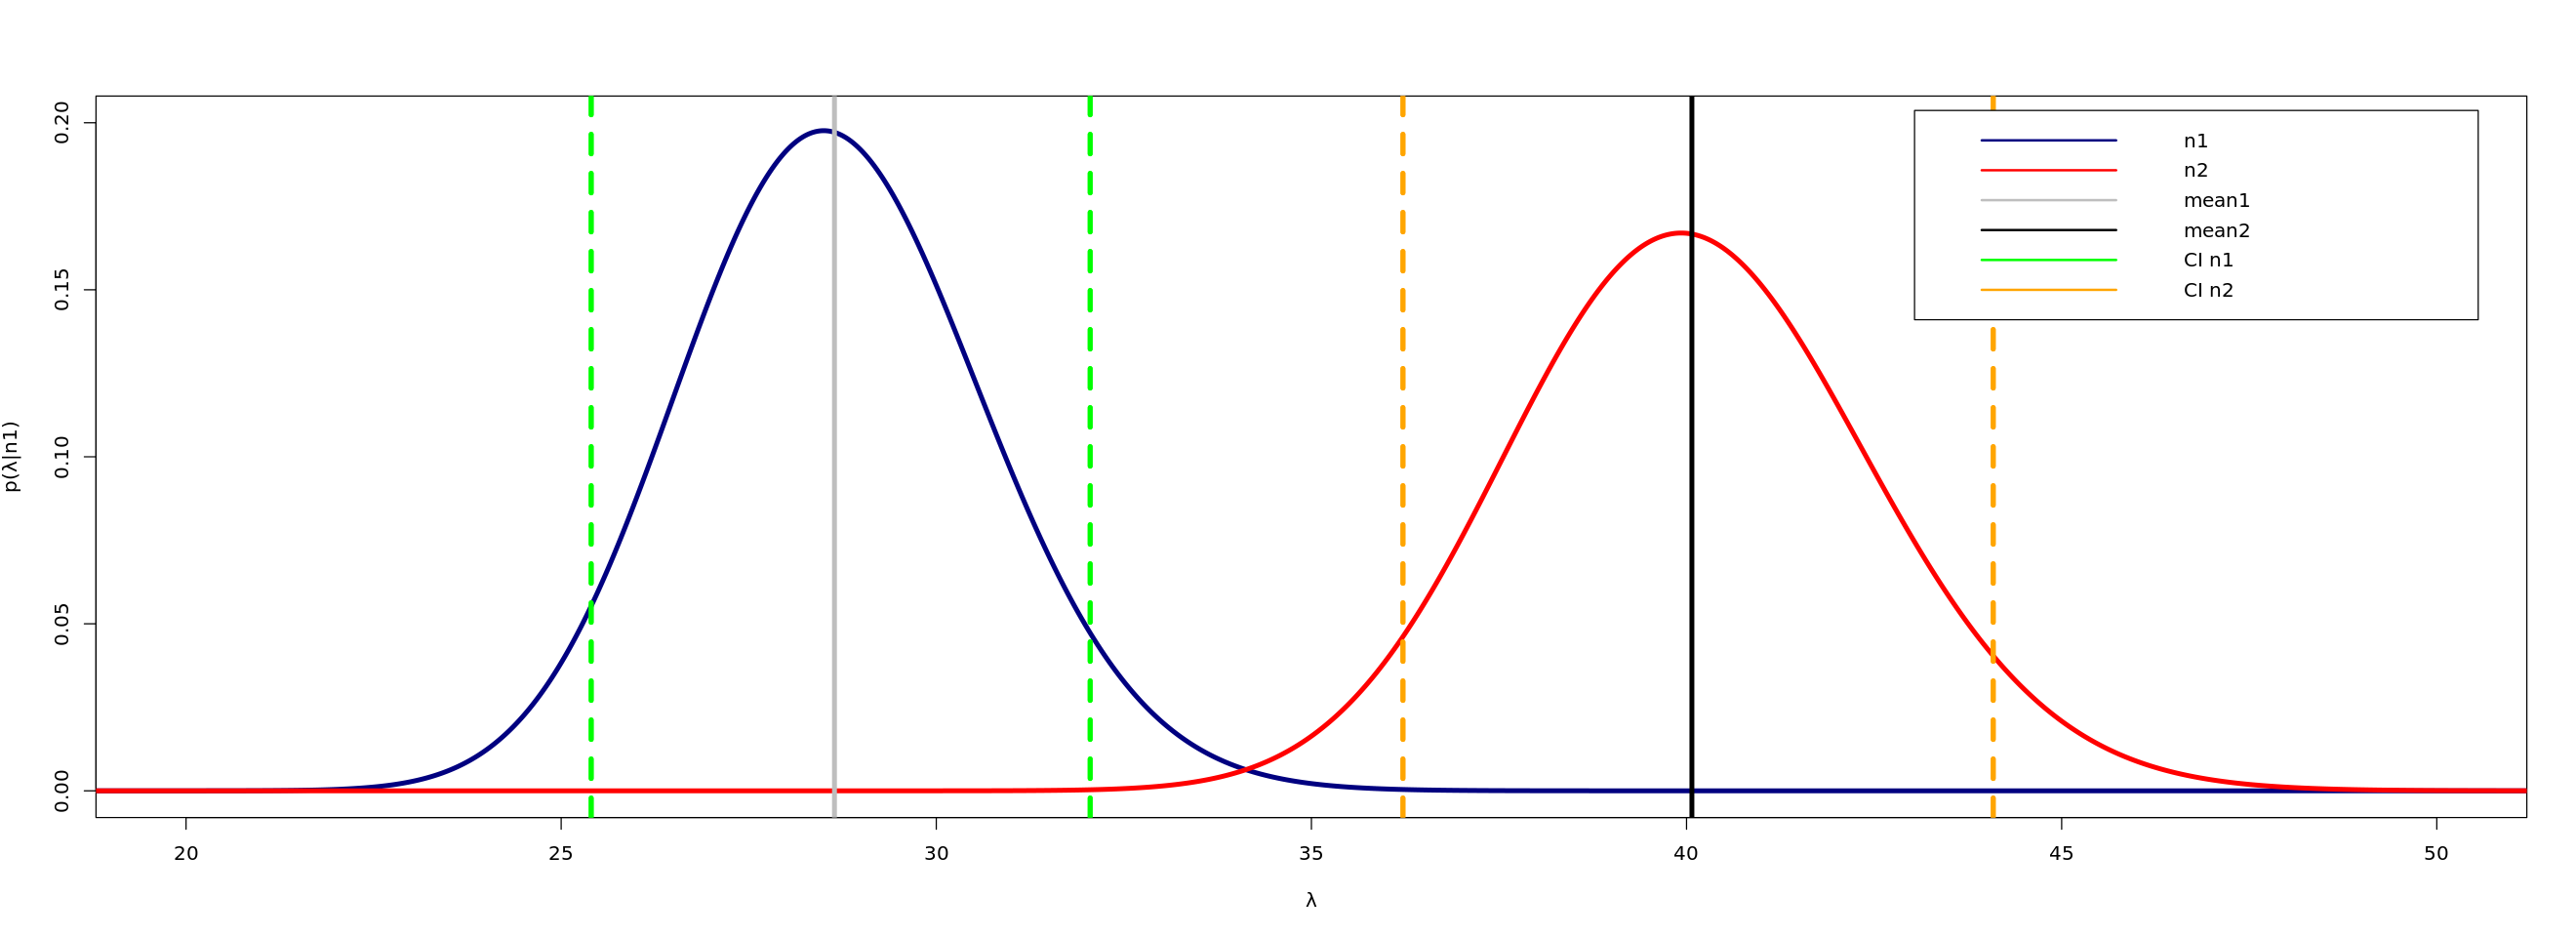

In [136]:
alpha <- 1/2
beta <- 1

dl <- 0.01
lambda <- seq(0,60, dl) 

postl_f1 <- function(l){
    dgamma(l, alpha + sum(n1), beta + n)
}

postl_f2 <- function(l){
    dgamma(l, alpha + sum(n2), beta + n)
}

mean1 = expectation(postl_f, 0, Inf)$value 
cat("Posterior mean n1 = ", mean1 , "\n")

mean2 = expectation(postl_f2, 0, Inf)$value 
cat("Posterior mean n2 = ", mean2, "\n")

qfunct <- function(funct, p){#made generic will be used later
    area <- 0
    i <- 0.001
    while(area < p){
        area <- integrate(funct, lower = 0, upper = i)$value
        i <- i + 0.001
    }
    return(i)
}

get_CI <- function(funct, p){#
    low  <- qfunct(funct, p)
    high <- qfunct(funct, 1-p)
    intervals <- sort(c(low, high))
    cat("The ", p*100, "%  credible interval is between", intervals[1], " and ", intervals[2] ,"\n")
    return(intervals)
}
cat("For n1 \n")
CI_1 <- get_CI(postl_f1, 0.95)
cat("For n2 \n")
CI_2 <- get_CI(postl_f2, 0.95)

plot(lambda, dgamma(lambda, alpha + sum(n1), beta + n), 
     type = 'l', lwd = 4, col = 'navy',
     xlab = expression(lambda), 
     ylab = expression(paste('p(', lambda, '|n1)')),
     ylim = c(0, 0.2),
     xlim = c(20,50))

lines(lambda, dgamma(lambda, alpha + sum(n2), beta + n), 
      type = 'l', lwd = 4, col = 'red')


abline(v = mean1, , lwd = 4 ,col ="grey")
abline(v = mean2, , lwd = 4)
abline(v = CI_1, , lwd = 4, col = "green", lty=2)
abline(v = CI_1, , lwd = 4, col = "green", lty=2)
abline(v = CI_2, , lwd = 4, col = "orange", lty=2)
abline(v = CI_2, , lwd = 4, col = "orange", lty=2)


legend('topright', inset = .02, legend = c('n1', 'n2', 'mean1', "mean2","CI n1", "CI n2"),
       col = c('navy', 'red', 'grey','black', 'green', 'orange'), lwd = 2)

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex3"></a>


##  Exercise 3: Water quality of streams
 
* Astudy on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.
* indicating with p the probability that a sample of water taken from the stream has a high bacter X level,

### Frequentist estimator for p

In [146]:
n<-116  #samples
y <- 11 #higher level
alpha <- 0.05
P <- y/n
cat(" Frequentist estimate for P =", P)

 Frequentist estimate for P = 0.09482759

### Posterior distribution $P(p|y)$, for $\beta(1,10)$

In [147]:
beta_prior <- dbeta(x, shape1 = 1, shape2 = 2)

For the case of beta(1,10) as prior 
The  95 %  credible interval is between 0.057  and  0.142 
mean =  0.09448819 , varience =  0.008835926 


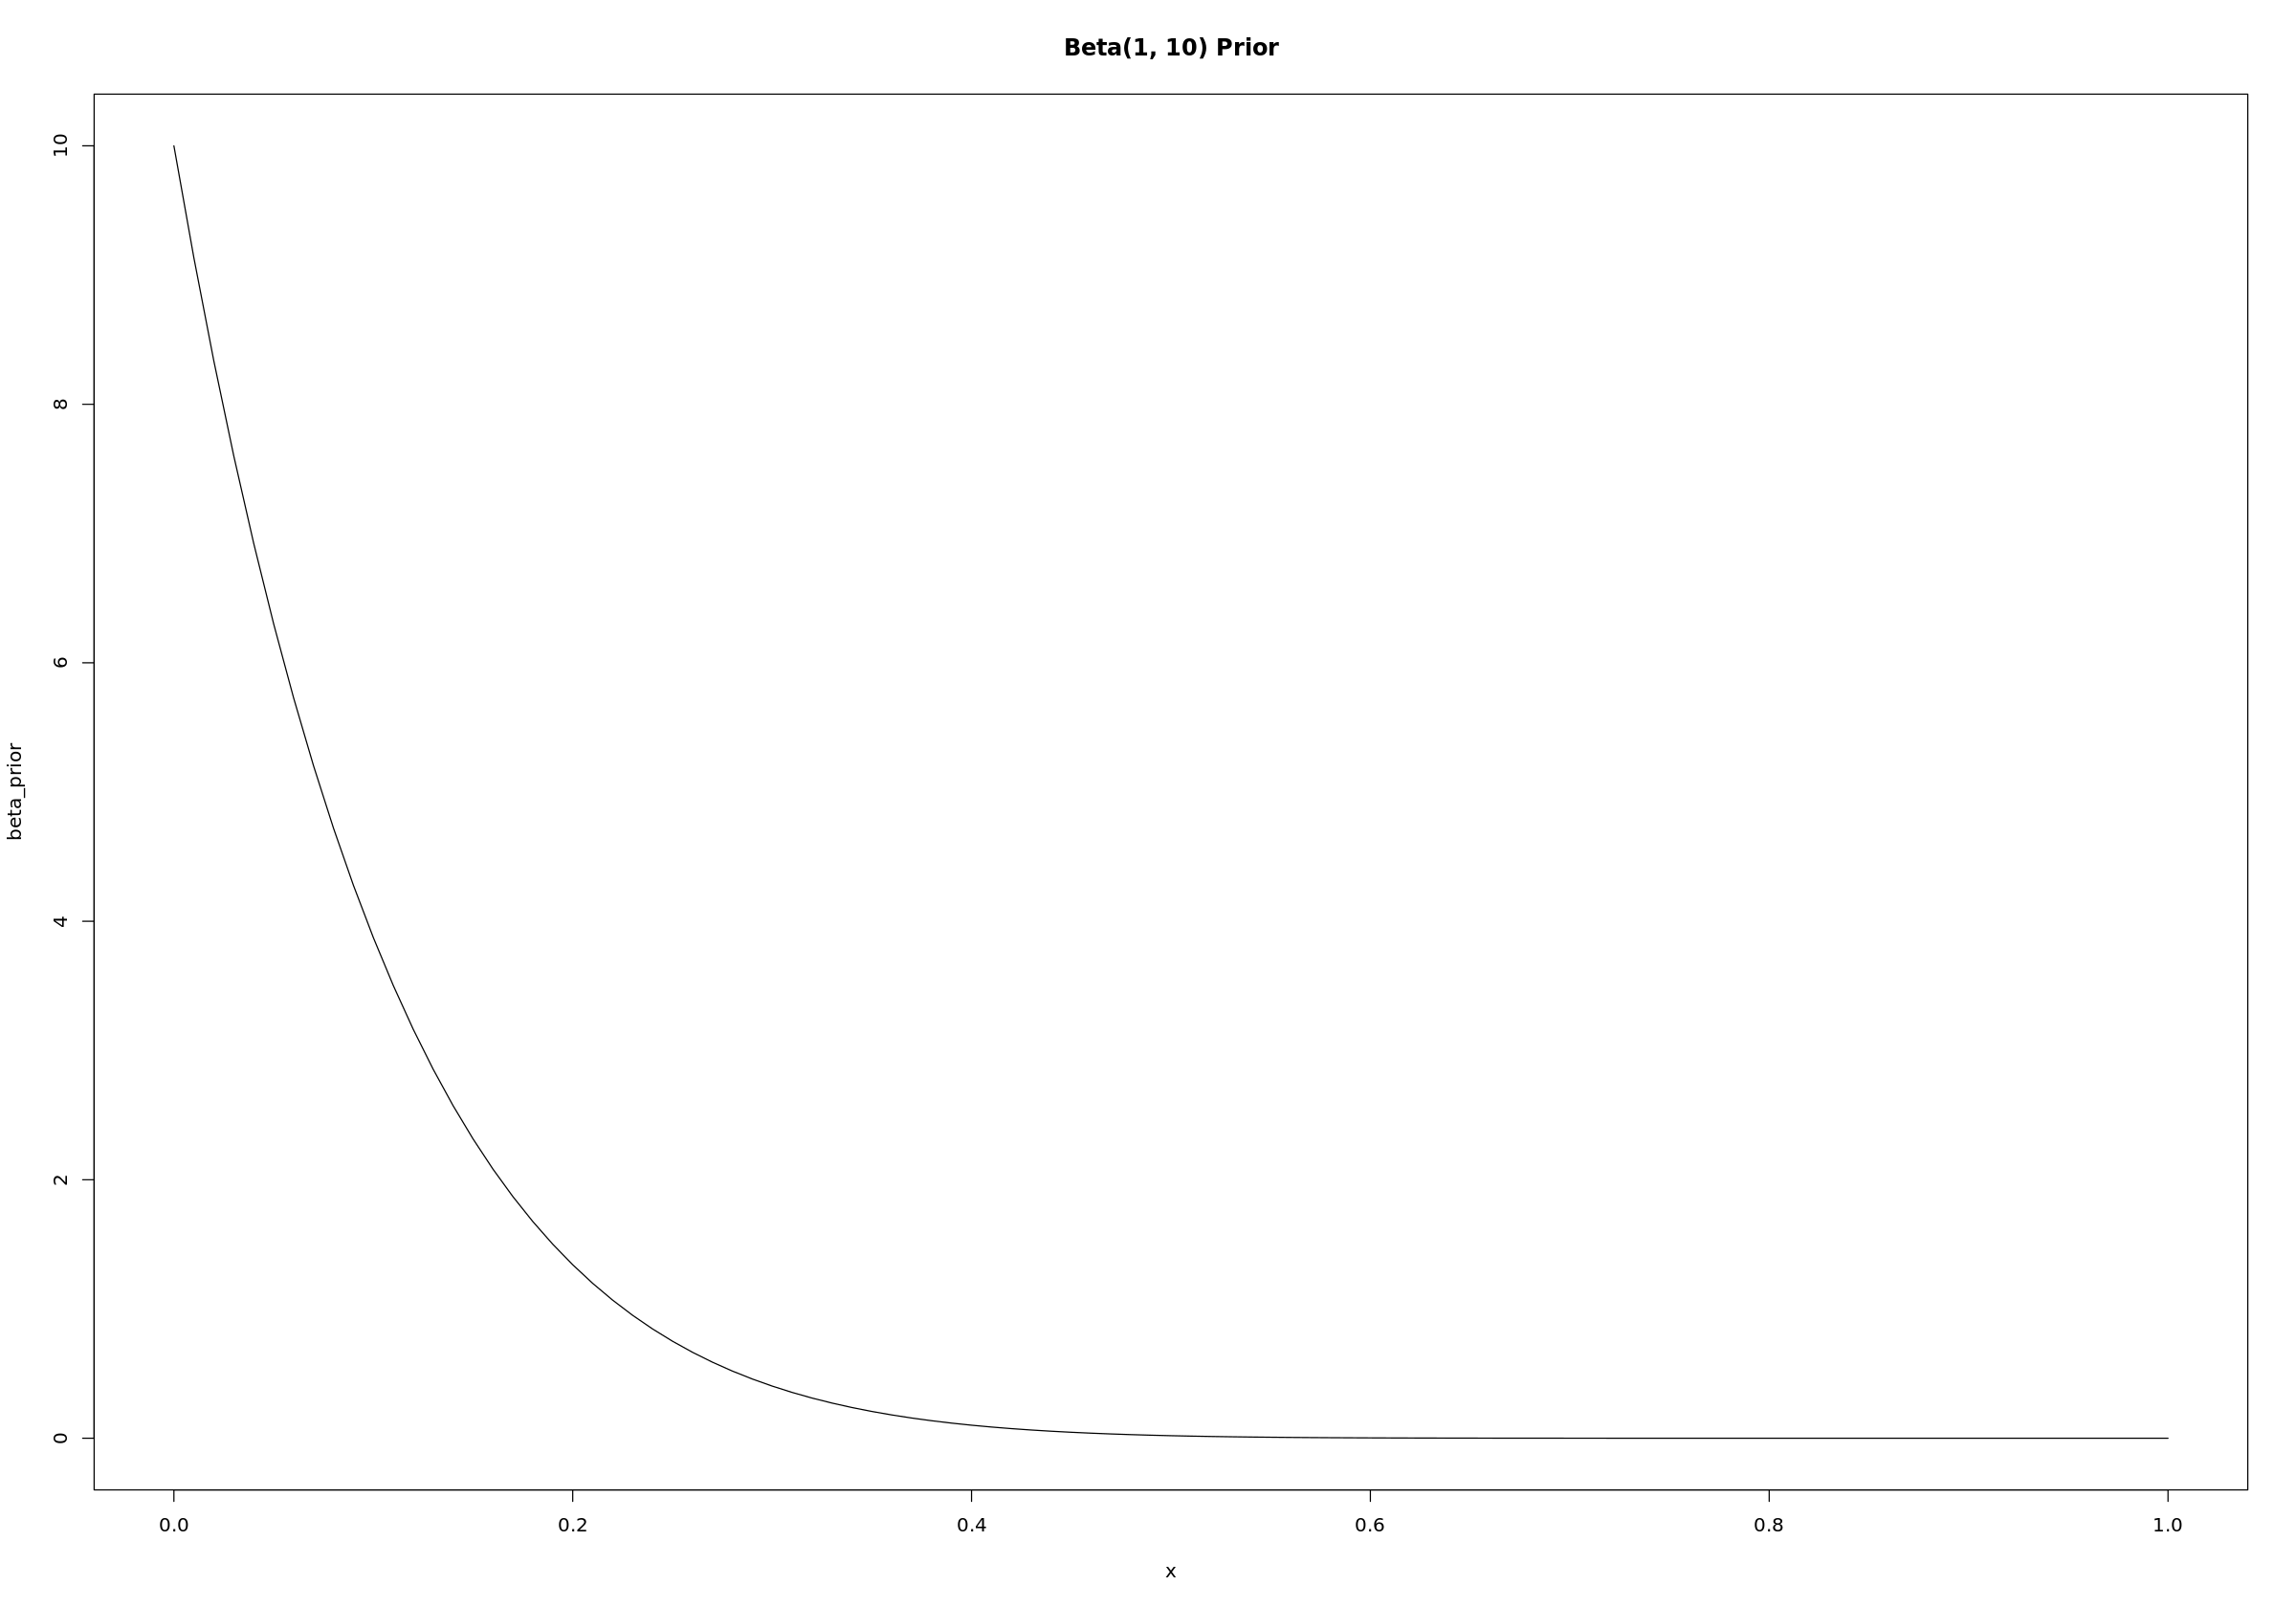

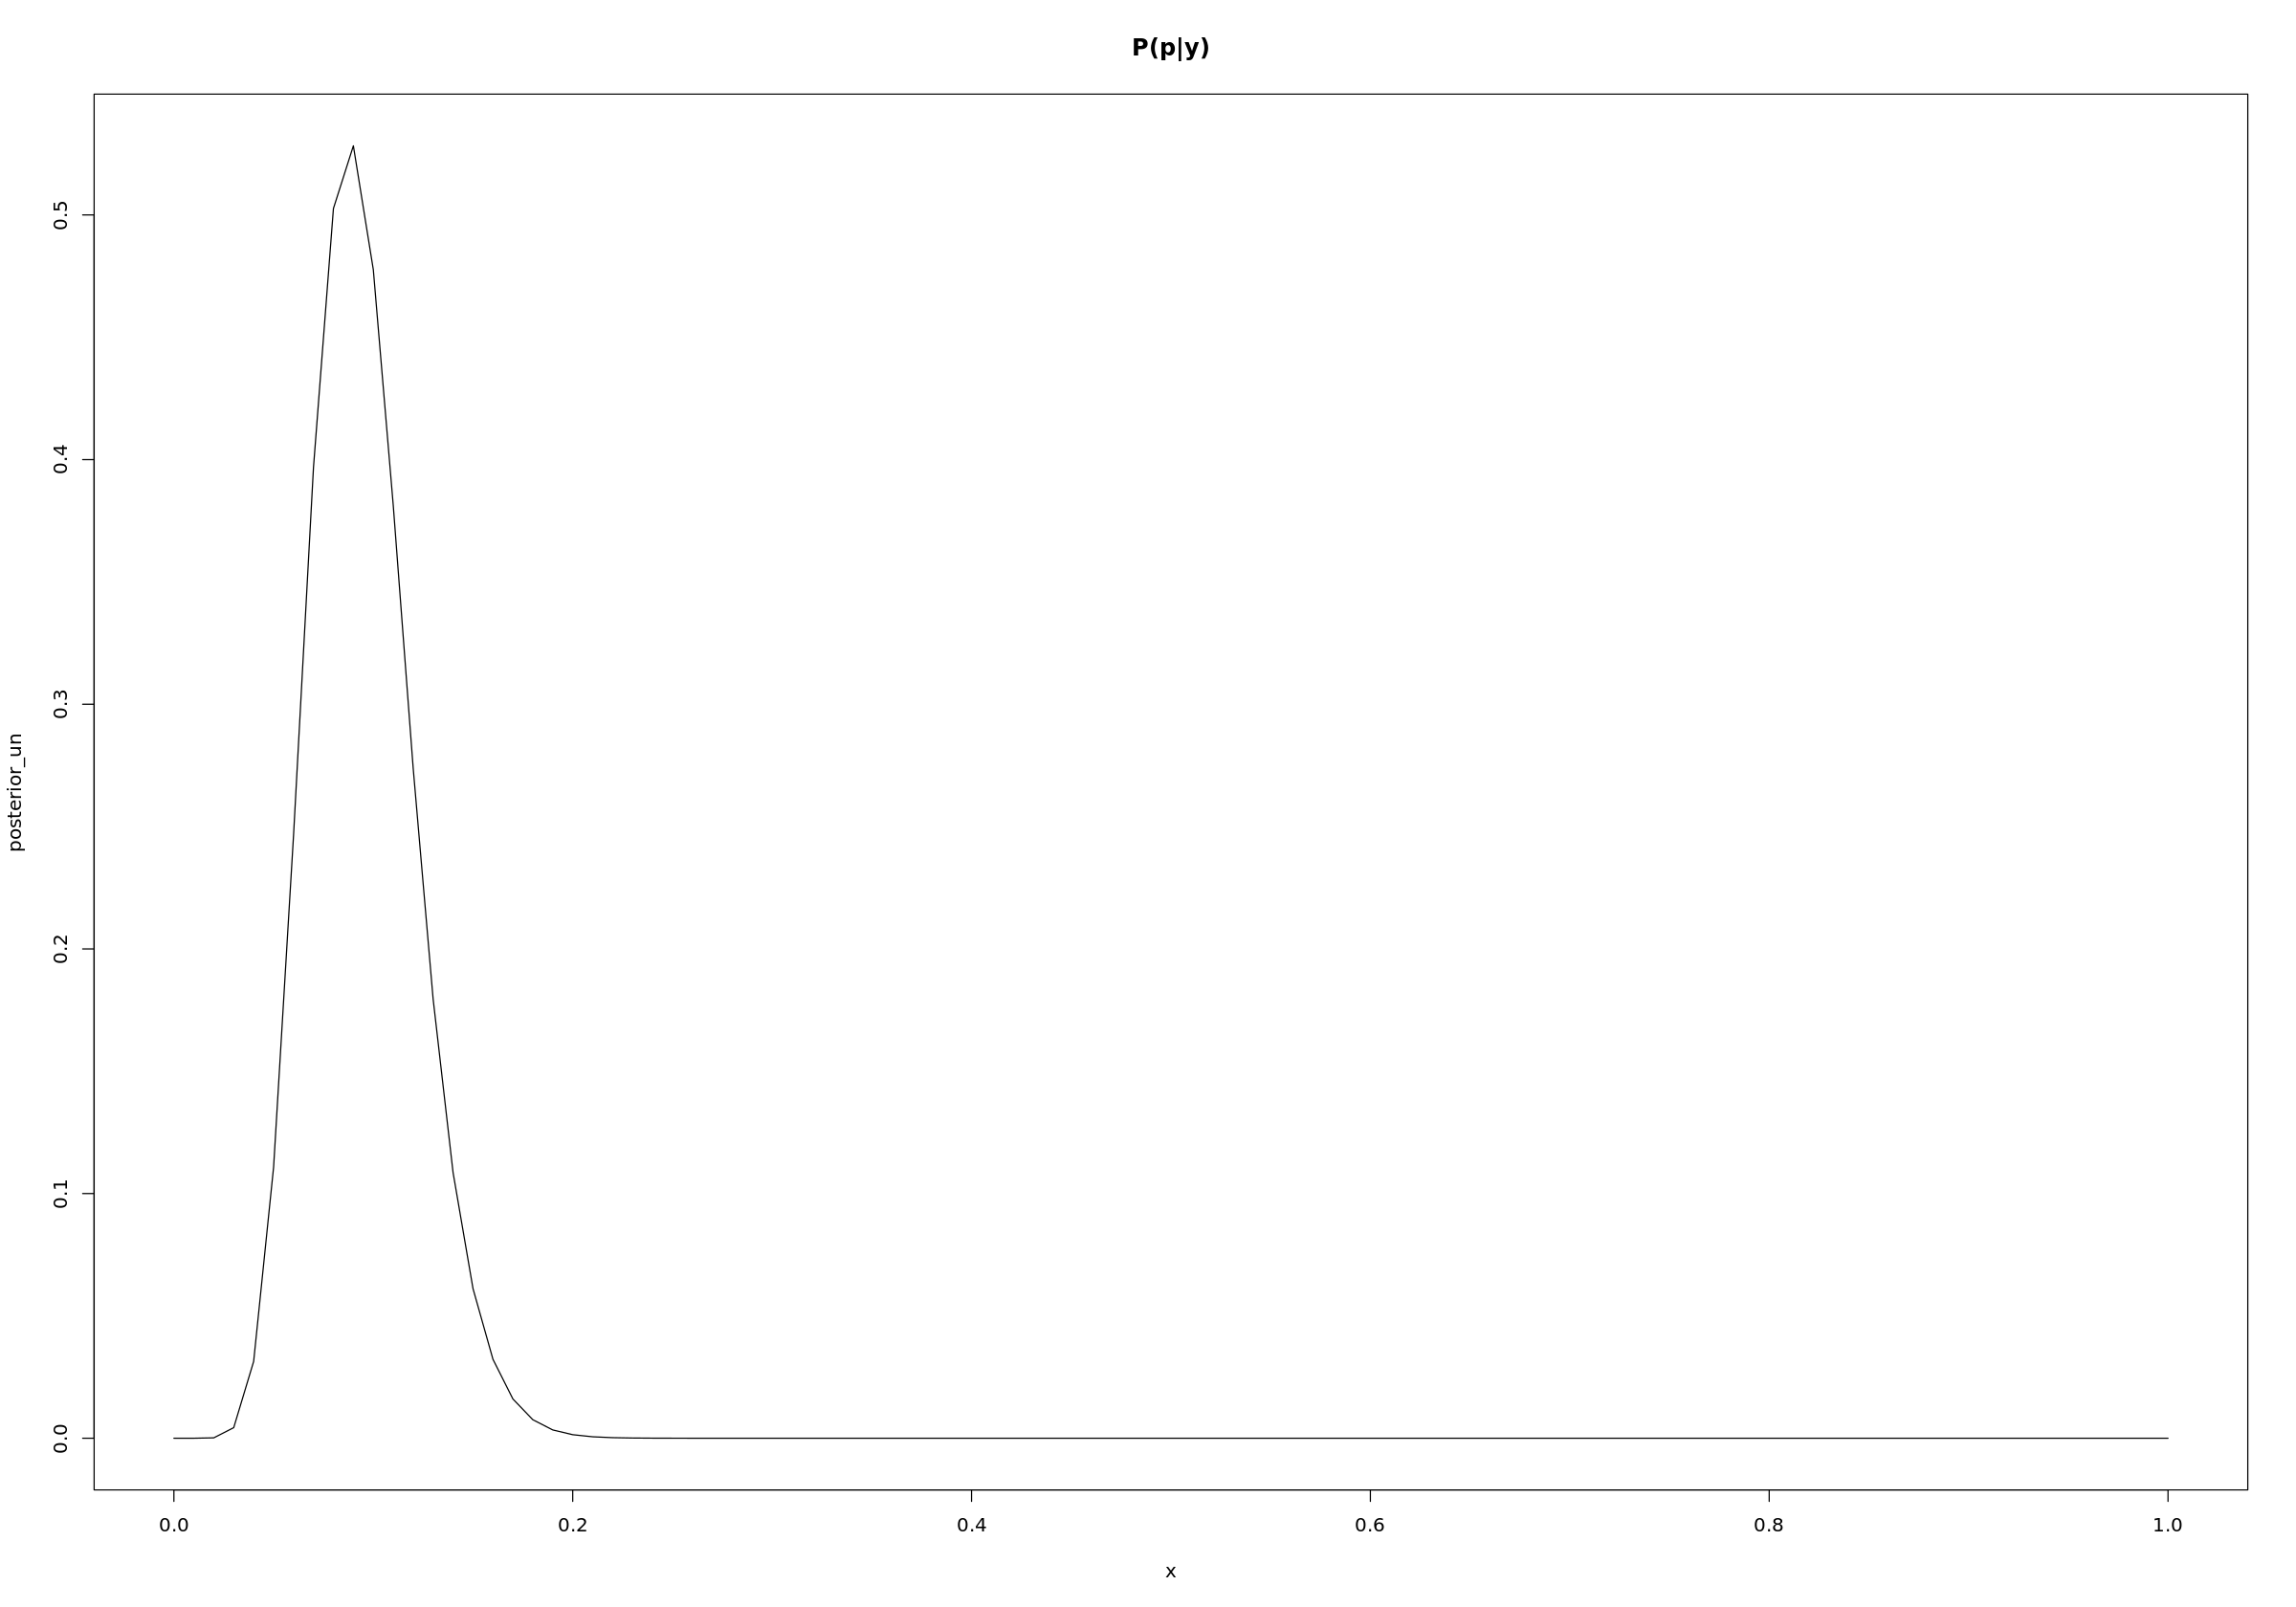

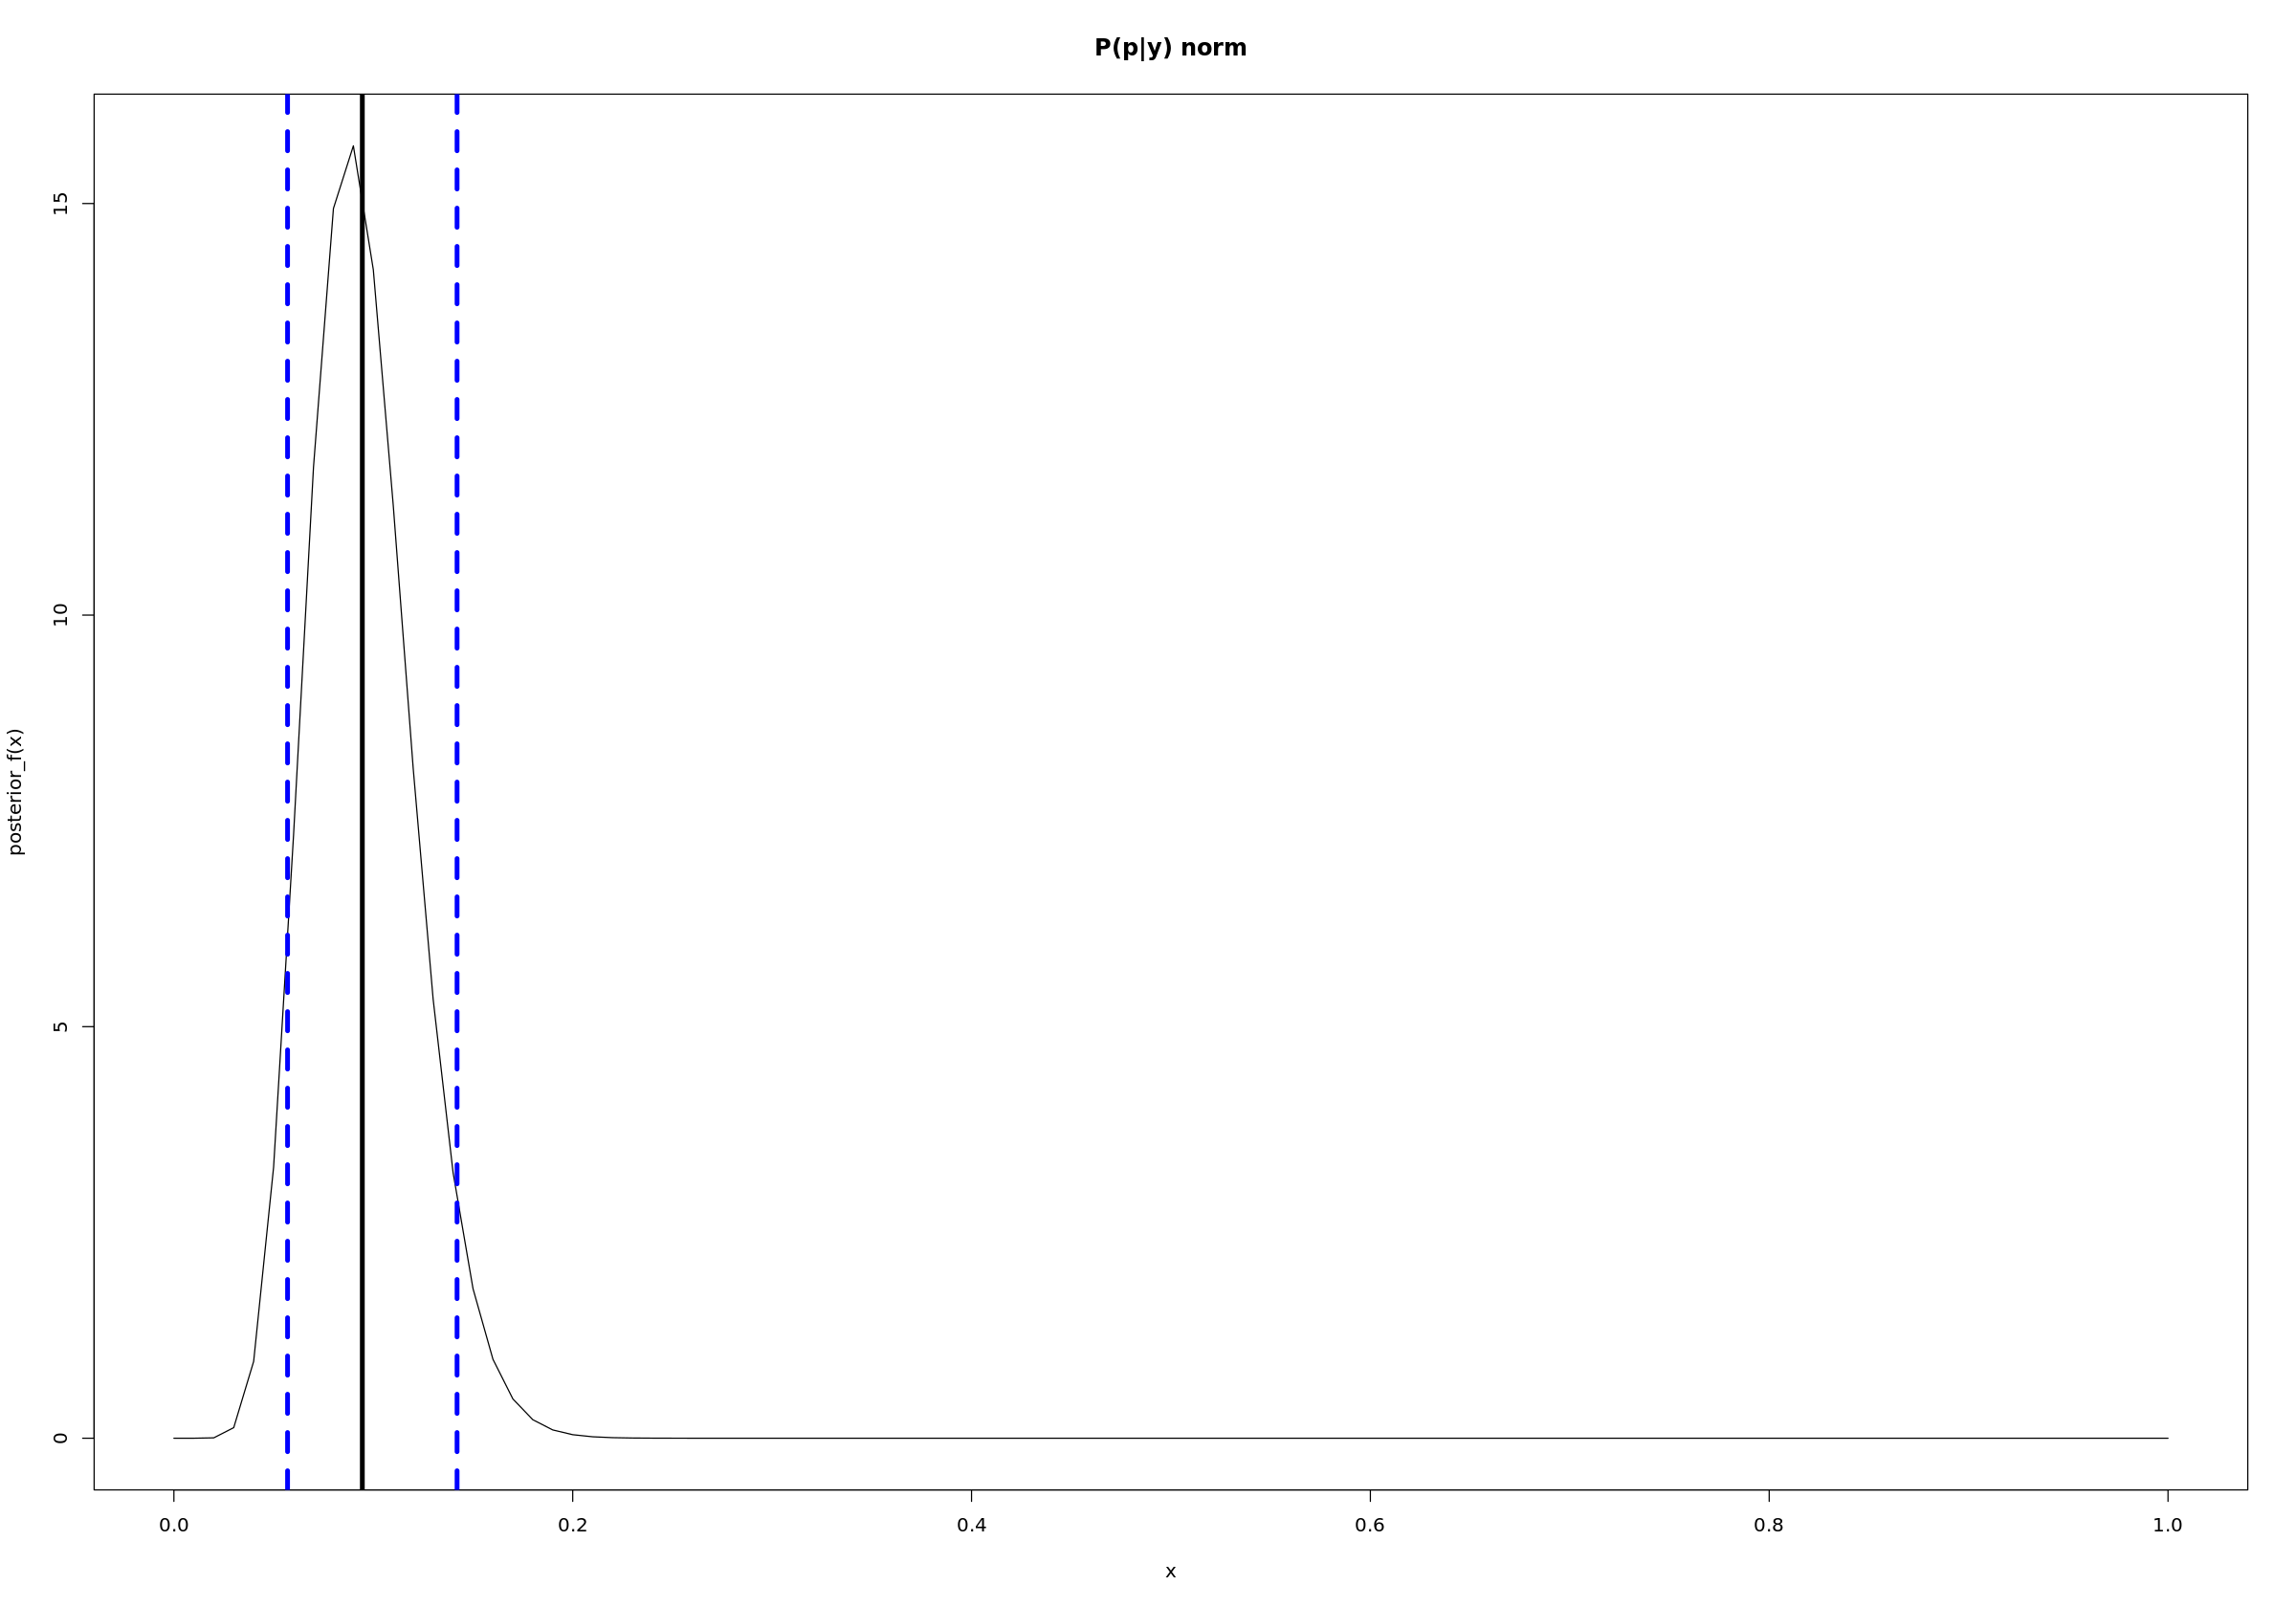

In [248]:
x<-seq(0, 1, 0.01)
y <- 11 #set in the question

beta_prior <- dbeta(x, shape1 = 1, shape2 = 10)
likelihood <- dbinom(y, size = n, prob=x)

posterior_un <- beta_prior*likelihood

posterior_f <- function(x){
    posterior_un_norm <- function(x){
    dbeta(x, shape1 = 1, shape2 = 10)*dbinom(y, size = n, prob=x)
    }
    Z<-integrate(posterior_un_norm, 0, 1)$value
    return(posterior_un_norm(x)/Z)
}


cat("For the case of beta(1,10) as prior \n")
CI <- get_CI(posterior_f, 0.95)
mean <- expectation(posterior_f, 0, 1)$value# defined earlier
var =expectation(posterior_f, 0, 1)$value^2-expectation_sq(posterior_f, 0, 1)$value^2
cat("mean = ", mean, ", varience = ", var ,"\n")

plot(x, beta_prior, type = "l", main="Beta(1, 10) Prior" )
plot(x, posterior_un, type ="l", main= "P(p|y)")
plot(x, posterior_f(x), type ="l", main= "P(p|y) norm")
abline(v=mean,  lwd = 4)
abline(v=CI[1],  col="blue", lty = 2, lwd = 4)
abline(v=CI[2],  col="blue", lty = 2, lwd =4)

### Find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [149]:
#####################################
posterior_mean <- expectation(posterior_f, 0, 1)$value# defined earlier
var =expectation(posterior_f, 0, 1)$value^2-expectation_sq(posterior_f, 0, 1)$value^2
cat("posterior mean = ", posterior_mean, ", varience = ", var ,"\n")

CI <- get_CI(posterior_f, 0.95)

posterior mean =  0.09448819 , varience =  0.008835926 
The  95 %  credible interval is between 0.057  and  0.142 


### Test the hypotesis $H_0$ : $p =0.1$ versus $H_1$ : $p\neq 0.1$ at 5% level of significance

###  Frequentist test of hypothesis

Again using the binomial estimation as either too high level of bacter X or not.

In [150]:
freq_test_2tail <- function(n, p, y, alpha){
    y_range <- seq(0,n, 1)
    cdf <- 2*pbinom(y_range, size=n , prob =p)#only in symetric dists

    for (i in 1:length(cdf)){
        if (cdf[i] > alpha){
            break
        }
        alpha_d <- cdf[i]#gets the one before break
        index <- i
    }

    cat("Two tail, discrete Alpha = ", alpha_d  ,"\n")

    y_opp <- abs(n - y)
    left_cdf <- pbinom(y_opp, size=n , prob =p)
    right_cdf <-  pbinom(y-1, size=n , prob =p, lower.tail = FALSE)
    cat("l =", left_cdf, "r =", right_cdf)
    cat(" Freqentist 2 Tail p-value =", left_cdf+right_cdf)

    pdf <-dbinom(y_range, size=n , prob =p)
    barplot(pdf, names = y_range, col= "light blue", ylab="p.d.f")
    abline(h = alpha, col="red", lwd = 4, lty=2)
    abline(h = alpha_d, col="green", lwd = 4, lty=2)
}

#freq_test_2tail(n=116, p=0.1, y=10, alpha = 0.05) needs a bit more work
binom.test(x = 10, n = 116, p=0.1) # defult both sides 


	Exact binomial test

data:  10 and 116
number of successes = 10, number of trials = 116, p-value = 0.7568
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.04211589 0.15282623
sample estimates:
probability of success 
             0.0862069 


### Bayesian test of hypothesis
The two tail hypothesis test  
Compute $(1 - \alpha)\times 100\%$  

In [166]:
bay_Htest_2Tail <- function(funct, alpha, P_null){
    CI_H <- get_CI(funct, 1-alpha)
    if (CI_H[1] < P_null && P_null < CI_H[2]){
        cat("CI_LOw = " ,CI_H[1] , "<", "P_null =", P_null, "< CI_HIGH = ", CI_H[2] , "\n")
        cat("Inside the (1 - α) CI range, do not reject null hypothesis \n")
    }
    else{
        if (P_null < CI_H[1]){
            cat("P_null =", P_null, "> CI_LOW = ", CI_H[1], "\n")
            cat("Outside interval reject the null hypothesis \n")
        }
        if (P_null > CI_H[2]){
            cat("P_null =", P_null, "> CI_HIGH = ", CI_H[2] , "\n")
            cat("Outside interval reject the null hypothesis \n")
        }
    }

}

bay_Htest_2Tail(posterior_f, alpha=0.05, P_null=0.1)

The  95 %  credible interval is between 0.041  and  0.136 
CI_LOw =  0.041 < P_null = 0.1 < CI_HIGH =  0.136 
Inside the (1 - α) CI range, do not reject null hypothesis 


## Exercise 3: Part 2

A new measurement is performed one month later on $n = 165$ water samples, the results gave $y = 9$ high bacter X level

### Ex3, pt 2 Frequentist estimator of p 

In [159]:
y_new<- 9
n_new <- 165
P_freq_new <- y_new/n_new
cat(" New frequentist estimate for P =", P_freq_new)

 New frequentist estimate for P = 0.05454545

### Ex3, pt 2 Bayesian estimator for p

posterior mean =  0.07191781 , varience =  0.005143011 
For the case of beta as prior 
The  95 %  credible interval is between 0.033  and  0.09 
mean =  0.05681818 , varience =  0.003215837 
 
For the case of previous posterior as prior 
The  95 %  credible interval is between 0.05  and  0.1 
mean =  0.07191781 , varience =  0.005143011 
 


Warning message in par(options(repr.plot.width = 20, repr.plot.height = 14)):
“"repr.plot.width" is not a graphical parameter”
Warning message in par(options(repr.plot.width = 20, repr.plot.height = 14)):
“"repr.plot.height" is not a graphical parameter”


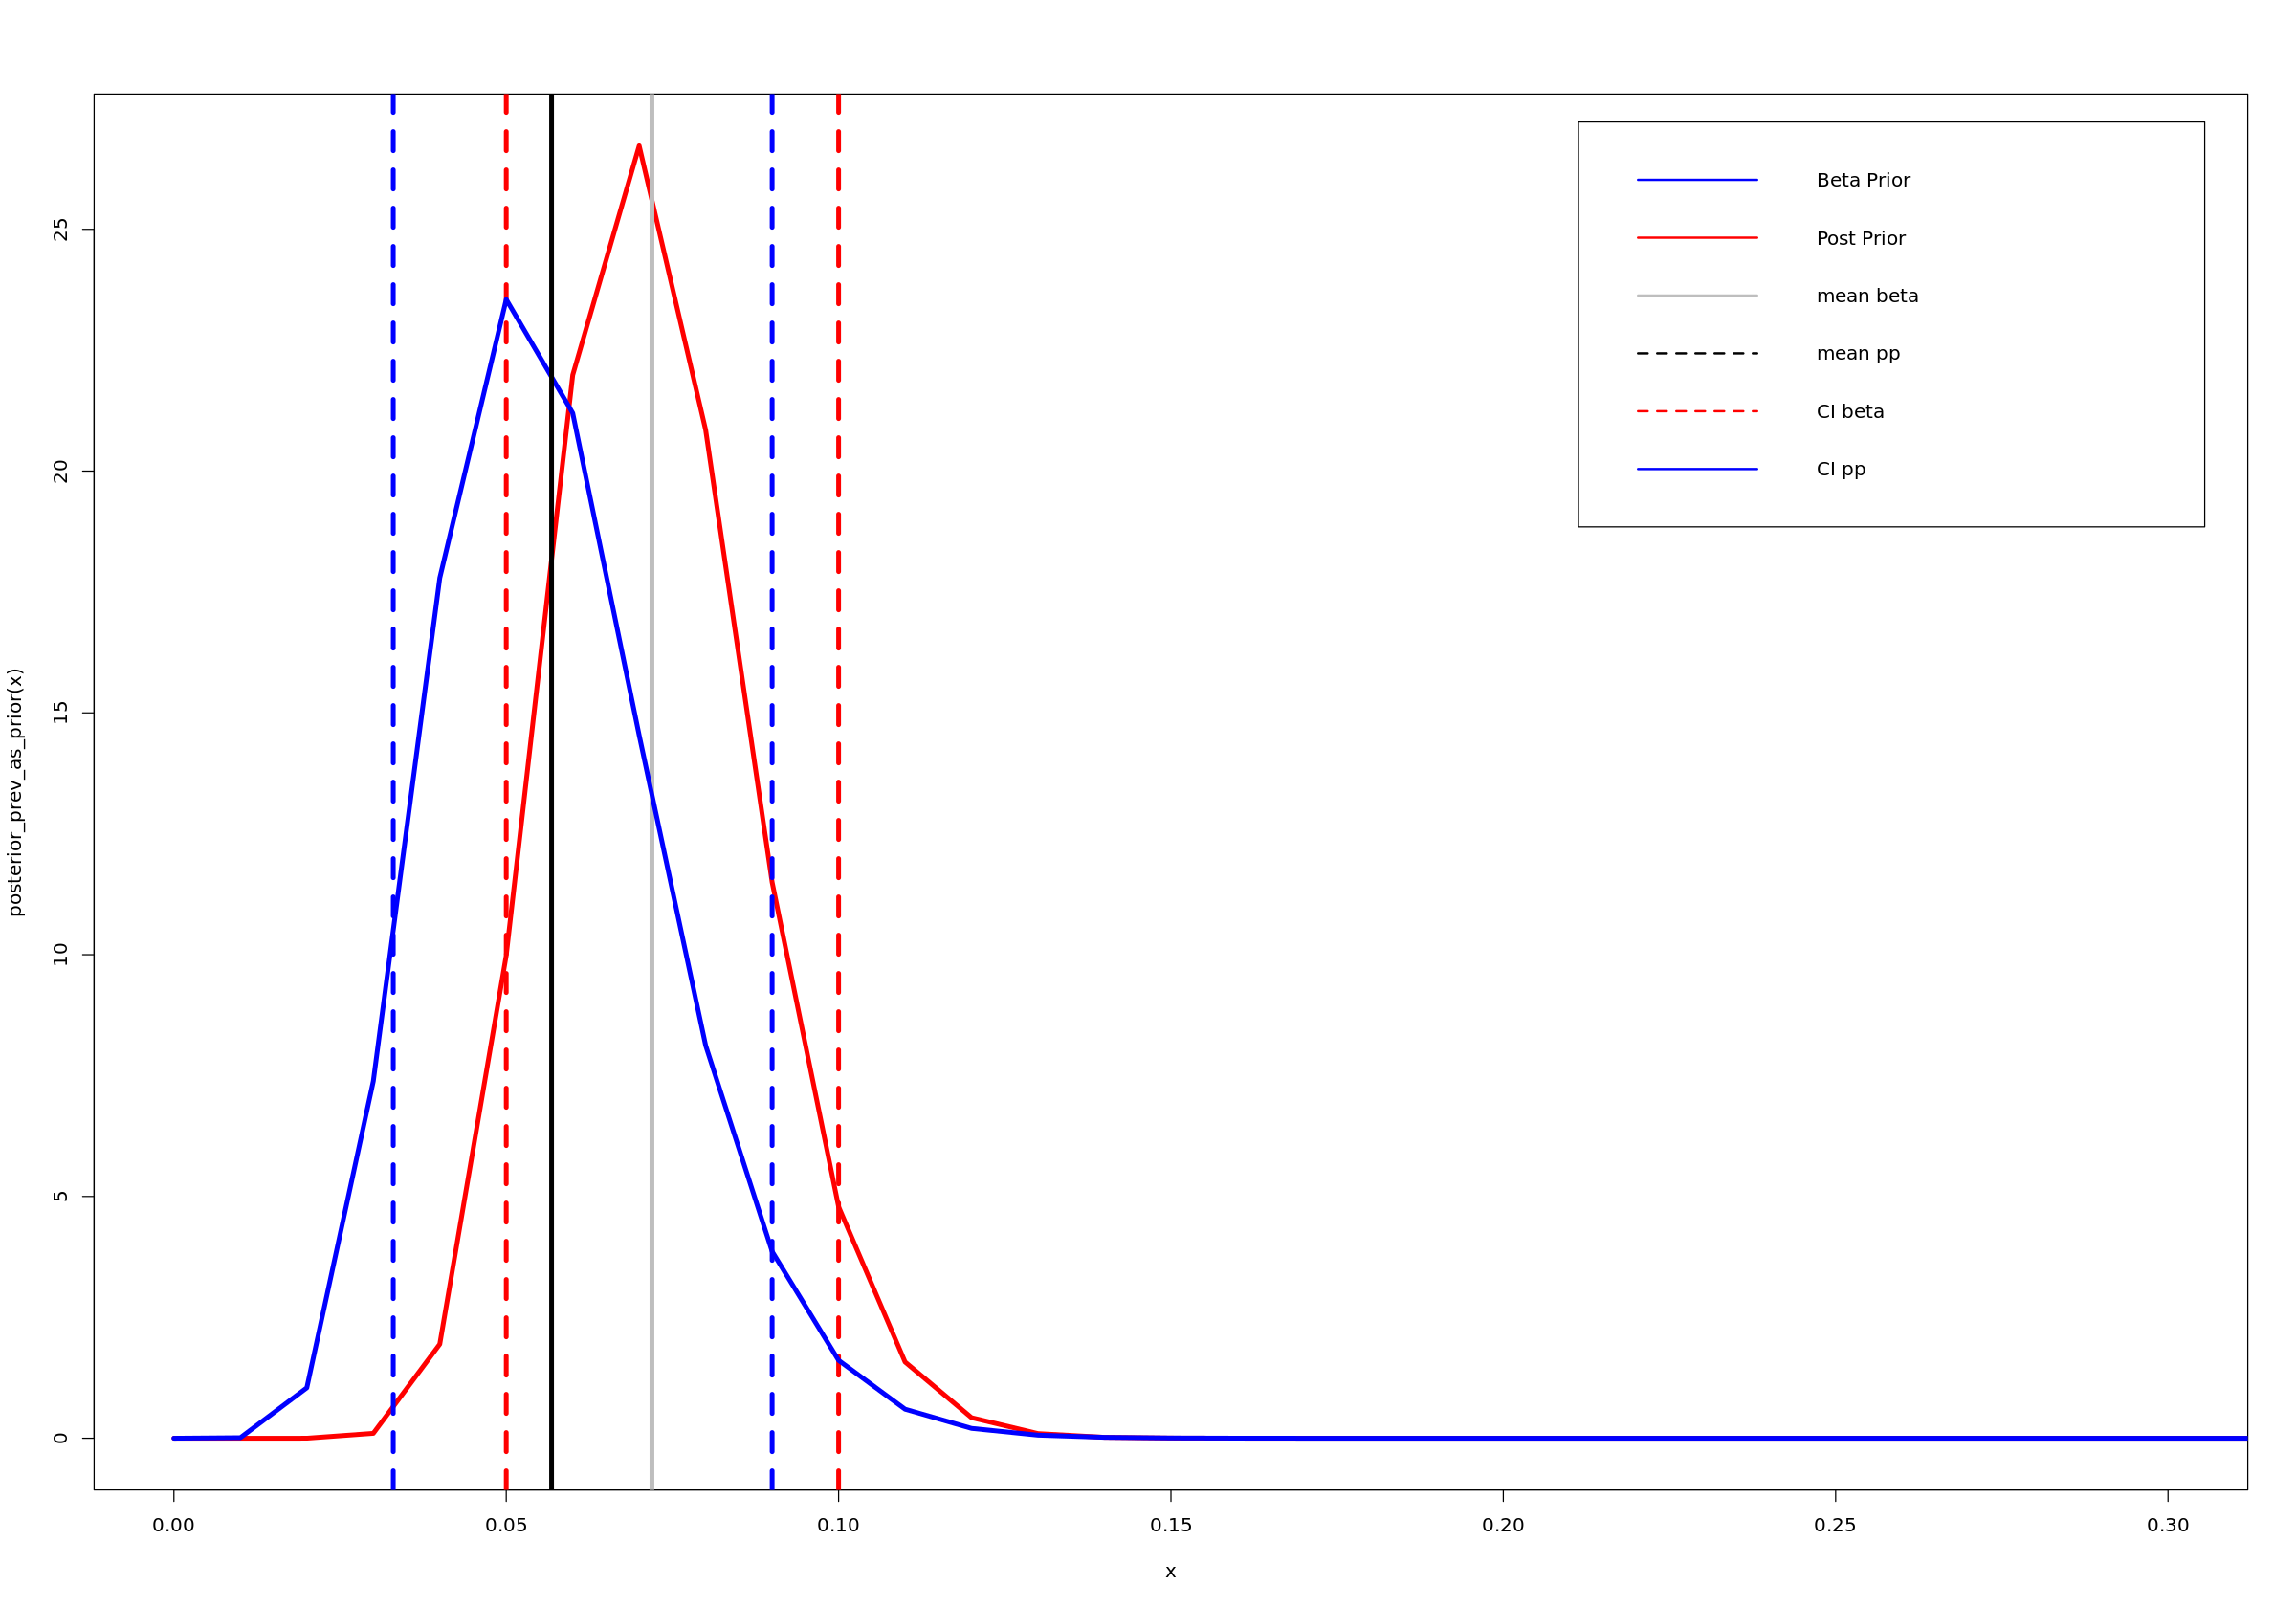

In [236]:
posterior_f_new <- function(x){
    posterior_un_norm <- function(x){
    dbeta(x, shape1 = 1, shape2 = 10)*dbinom(y_new, size = n_new, prob=x)
    }
    Z<-integrate(posterior_un_norm, 0, 1)$value
    return(posterior_un_norm(x)/Z)
}

posterior_prev_as_prior <- function(x){
    posterior_un_norm <- function(x){
    posterior_f(x)*dbinom(y_new, size = n_new, prob=x)
    }
    Z<-integrate(posterior_un_norm, 0, 1)$value
    return(posterior_un_norm(x)/Z)
}

#####################################
new_post_mean <- expectation(posterior_prev_as_prior, 0, 1)$value# defined earlier
var =expectation(posterior_prev_as_prior, 0, 1)$value^2-expectation_sq(posterior_prev_as_prior, 0, 1)$value^2
cat("posterior mean = ", new_post_mean, ", varience = ", var ,"\n")

cat("For the case of beta as prior \n")
CI_b <- get_CI(posterior_f_new, 0.95)
mean_b <- expectation(posterior_f_new, 0, 1)$value# defined earlier
var_b =expectation(posterior_f_new, 0, 1)$value^2-expectation_sq(posterior_f_new, 0, 1)$value^2
cat("mean = ", mean_b, ", varience = ", var_b ,"\n \n")

cat("For the case of previous posterior as prior \n")
CI_pp <- get_CI(posterior_prev_as_prior, 0.95)
mean_pp <- expectation(posterior_prev_as_prior, 0, 1)$value# defined earlier
var_pp =expectation(posterior_prev_as_prior, 0, 1)$value^2-expectation_sq(posterior_prev_as_prior, 0, 1)$value^2
cat("mean = ", mean_pp, ", varience = ", var_pp ,"\n \n")

par(options(repr.plot.width = 20, repr.plot.height = 14))

plot(x, posterior_prev_as_prior(x), type = "l", col="red",
     lwd =4, 
     xlim = c(0, 0.3)#only after checking the full range
    )
abline(v=mean_pp,  lwd = 4, col="grey")
abline(v=CI_pp[1],  col="red", lty = 2, lwd = 4)
abline(v=CI_pp[2],  col="red", lty = 2, lwd =4)

lines(x, posterior_f_new(x), type = "l", col ="blue", lwd =4)

abline(v=mean_b,  lwd = 4)
abline(v=CI_b[1],  col="blue", lty = 2, lwd = 4)
abline(v=CI_b[2],  col="blue", lty = 2, lwd =4)

legend('topright', inset = .02, legend = c('Beta Prior', 'Post Prior', "mean beta" ,"mean pp","CI beta", "CI pp"),
       col = c('blue', 'red','grey', 'black', 'red', 'blue'), lwd = 2, lty=c(1,1, 1,2,2))

### Ex3, pt 2 Frequentist Hypotheis test

In [168]:
#freq_Htest_binom(y = 9, n=165, alpha = 0.05, P_null =0.1)
binom.test(x = 9, n = 165, p=0.1) # defult both sides 


	Exact binomial test

data:  9 and 165
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


### Ex3, pt 2 Bayesian Hypotheis tests

In [169]:
bay_Htest_2Tail(posterior_prev_as_prior, alpha=0.05, P_null=0.1)

The  95 %  credible interval is between 0.042  and  0.092 
P_null = 0.1 > CI_HIGH =  0.092 
Outside interval reject the null hypothesis 


<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex4"></a>

## Exercise 4: MCMC with JAGS - Blood disease detection


In [199]:
n <- 75
y <-6
X <- rep(0,75) # repeat 75 zeros
s <-sample(1:n, y) #create 6 random positions
X[s] <- 1
data <- NULL
data$X <- X
cat("Random Insertions", length(X[X==1]))

Random Insertions 6

In [200]:
#write the model for JAGS to use
cat("model {
    #  Likelihood #############
    for (i in 1:length(X)) {
        X[i] ~ dbern(p);
    }
    #  Uniform prior ##########
    p ~ dbeta(1, 1);
}" 
,file="HW6_EX4_blood.bug")

In [201]:
library(rjags)
burn_in <- 1000
j_model <- jags.model('HW6_EX4_blood.bug',data)
update(j_model, burn_in) #start with the burn in 
mc <- coda.samples(model = j_model, variable.names = c("p"), n.iter=10000) #sampling
summary(mc)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 75
   Unobserved stochastic nodes: 1
   Total graph size: 77

Initializing model




Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0912485      0.0323821      0.0003238      0.0003238 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.03874 0.06757 0.08793 0.11124 0.16439 


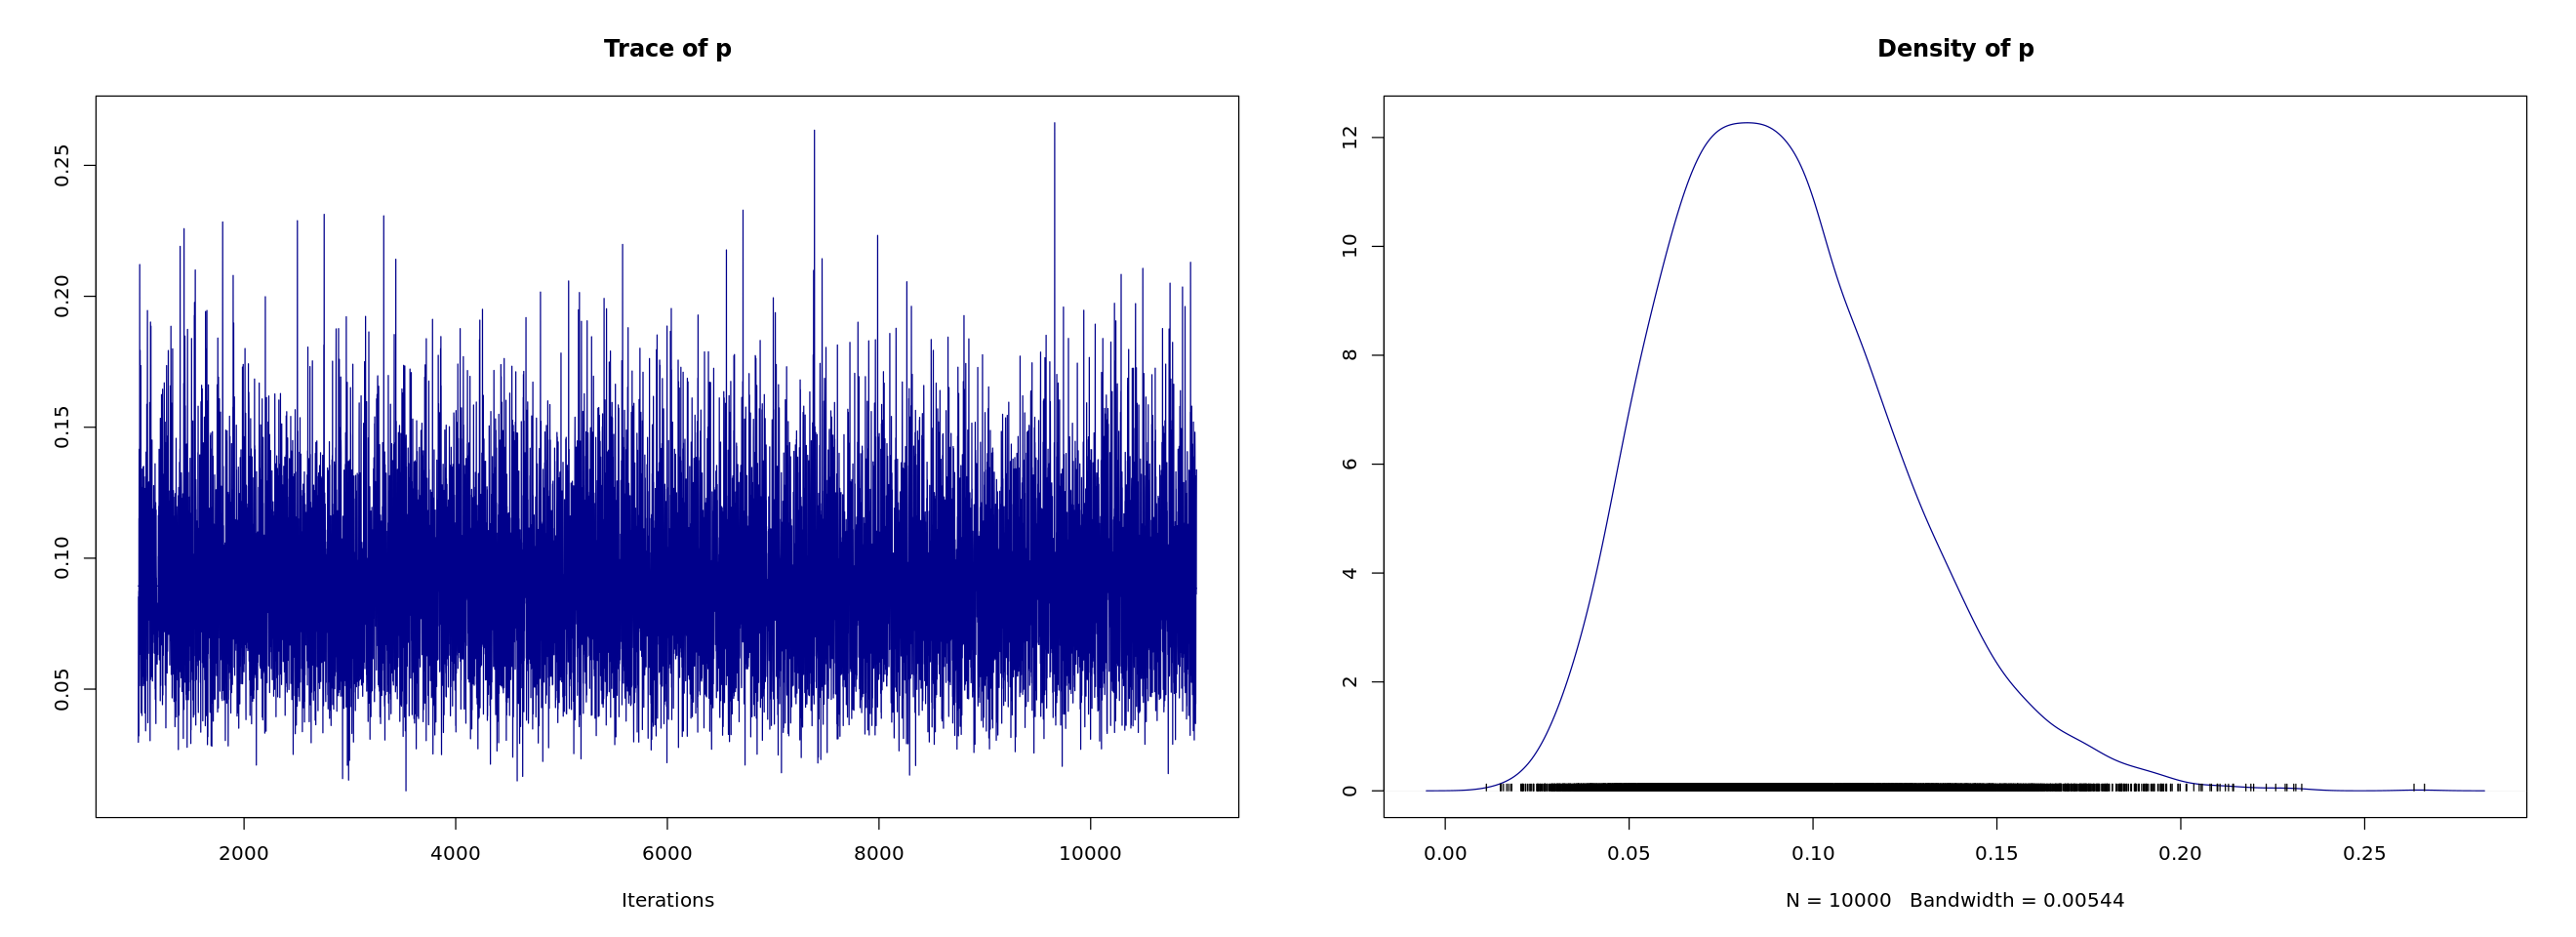

In [202]:
plot(mc, col="dark blue")

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex5"></a>

## Exercise 5: MCMC with JAGS - Poission horse death kick

## n1 observations

In [203]:
n1 <- c(109,65,22,3,1,0)
n2 <- c(144,91,32,11,2,0)
X<- c(rep(0, n1[1]), rep(1, n1[2]), rep(2, n1[3]), rep(3, n1[4]), rep(4, n1[5]))
X <-sample(X) # randomize the sample
data <- NULL
data$X <- X
cat("Input Data (n1 observations): \n", X)

Input Data (n1 observations): 
 0 0 1 1 0 1 2 1 2 1 2 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 2 1 2 0 0 0 0 1 2 2 0 0 1 1 0 1 1 0 0 0 2 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 4 1 2 0 0 0 2 0 1 0 1 0 0 0 2 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 2 0 0 1 0 0 0 1 1 1 0 0 1 0 3 0 0 1 1 1 0 0 1 2 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 2 0 2 0 0 0 1 2 0 1 2 0 1 0 1 0 0 2 1 0 0 0 3 0 0 0 0 0 0 0 1 1 0 1 3 1 0 0 1 2 2 0 1 0 0 1 0 0 2 0 0 0 1 1 1 0 0 2

In [204]:
#write the model for JAGS to use
cat("model {
    # Likelihood
    for (i in 1:length(X)) {
        X[i] ~ dpois(lambda); 
    }
    # Uniform prior for lambda
    lambda ~ dexp(0.00001);
}" 
,file="HW6_EX5_death_kick.bug")

In [205]:
j_model_n1 <- jags.model('HW6_EX5_death_kick.bug', data)
update(j_model_n1, burn_in)
mc <- coda.samples(model = j_model_n1, variable.names = c("lambda"), n.iter=10000)
summary(mc)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 1
   Total graph size: 202

Initializing model




Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6150141      0.0554793      0.0005548      0.0005407 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5123 0.5768 0.6134 0.6513 0.7295 


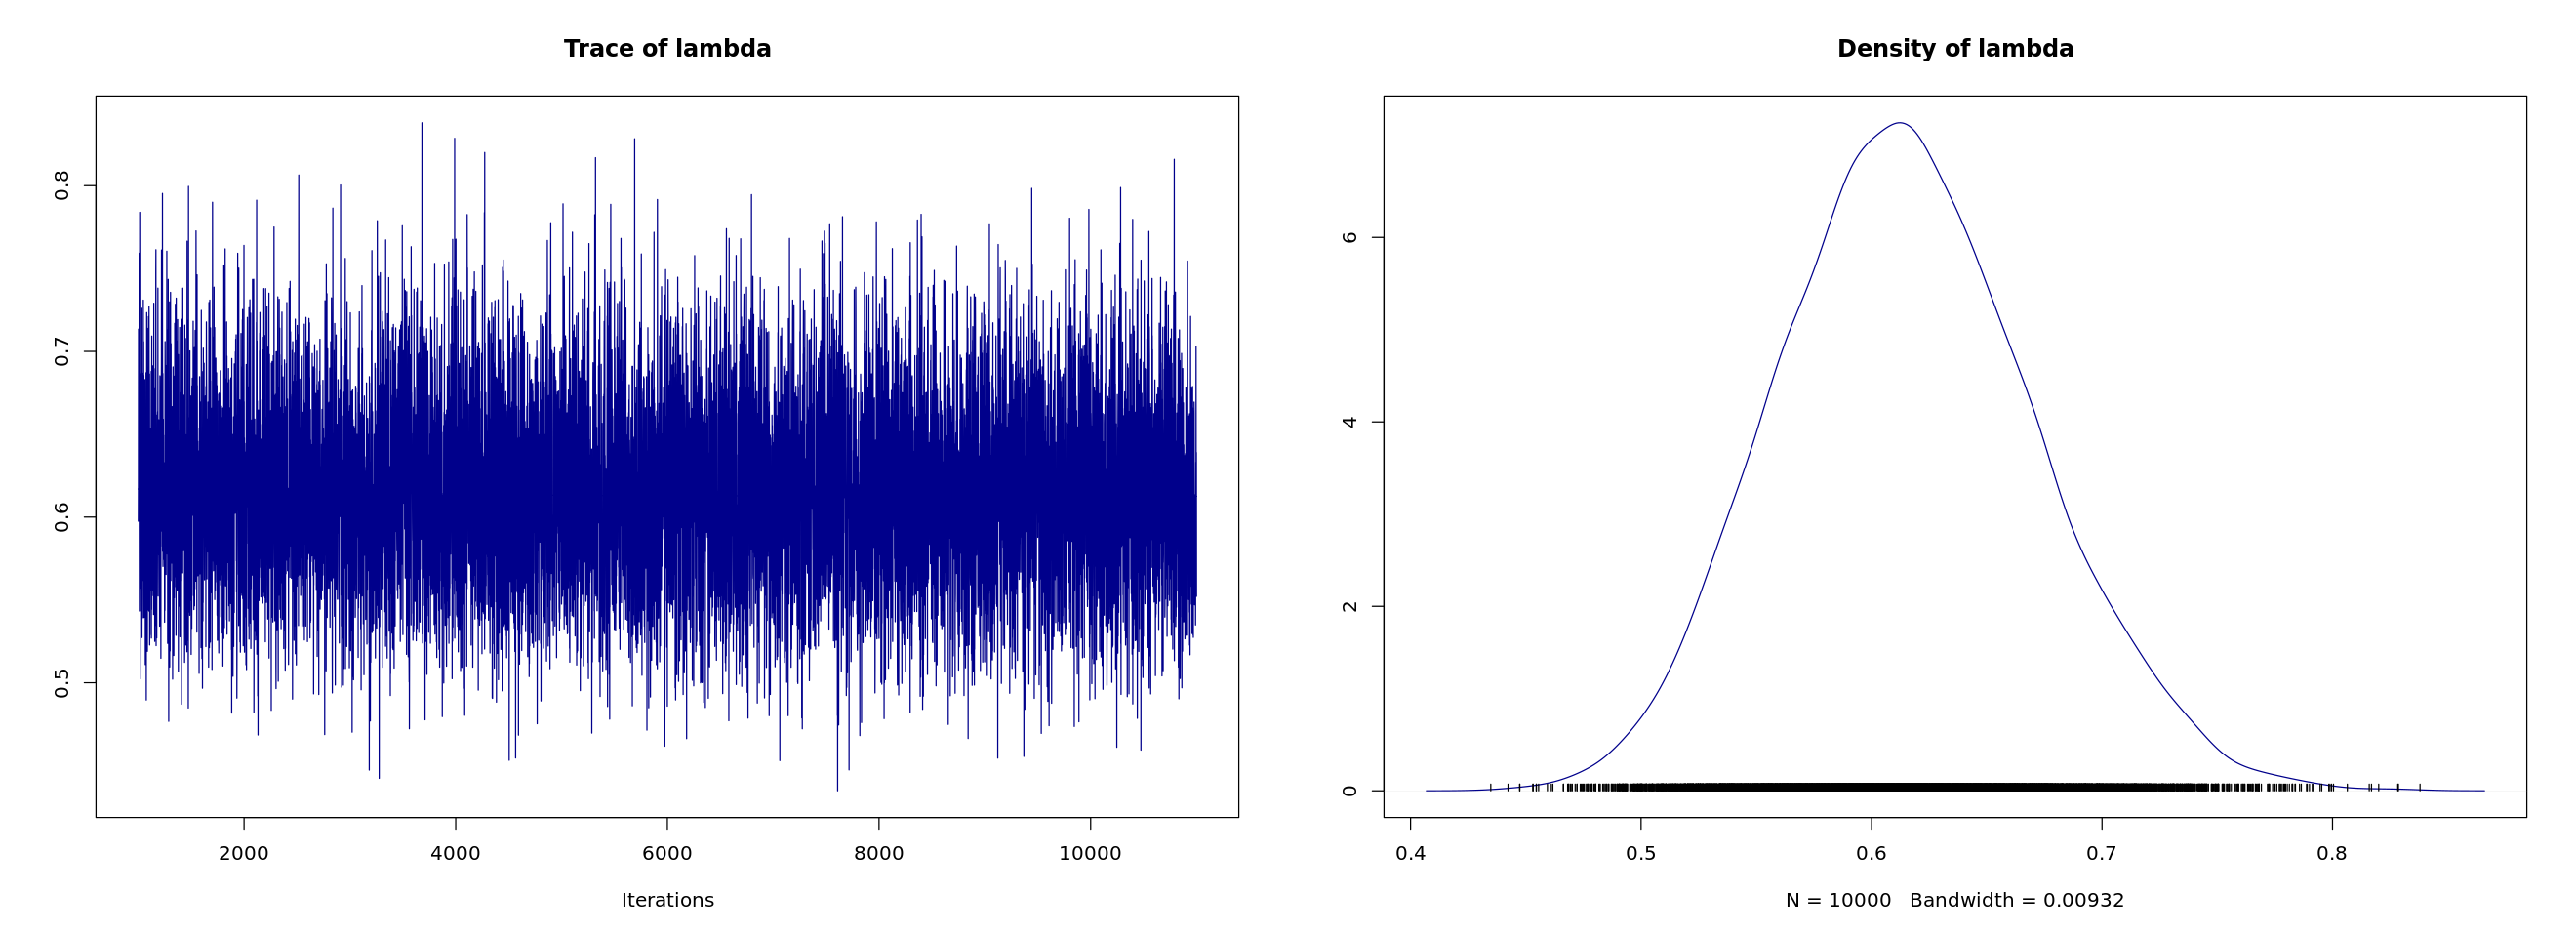

In [206]:
plot(mc, col="dark blue")

## n2 observations

In [207]:
n2 <- c(144,91,32,11,2,0)
X<- c(rep(0, n2[1]), rep(1, n2[2]), rep(2, n2[3]), rep(3, n2[4]), rep(4, n2[5]))
X <-sample(X) # randomize the sample
data <- NULL
data$X <- X
cat("Input Data (n2 observations): \n", X)

Input Data (n2 observations): 
 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 1 0 4 0 0 1 3 1 0 2 0 1 1 1 2 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 3 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 3 0 0 2 0 2 2 0 1 0 2 0 4 0 0 1 2 0 0 0 0 0 2 0 0 0 0 1 0 1 0 1 2 1 0 1 2 1 2 0 0 0 0 0 1 0 1 0 1 0 0 3 1 2 0 1 0 0 0 1 0 0 1 1 0 0 1 2 2 1 0 0 3 0 1 1 1 3 0 1 0 0 0 0 0 2 2 0 2 1 0 1 0 1 0 2 1 0 0 0 0 0 1 1 0 1 0 2 0 2 0 3 2 1 0 1 2 0 0 0 2 0 0 2 0 1 0 3 0 1 2 0 0 1 1 0 1 0 1 0 0 0 1 0 0 2 1 0 1 0 1 1 0 1 2 0 0 0 0 1 0 1 0 0 1 0 0 0 0 3 0 0 2 1 2 1 0 0 0 2 1 3 0 0 1 1 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 1 1 1 0 1 1 3 1

In [208]:
j_model_n2 <- jags.model('HW6_EX5_death_kick.bug', data)
update(j_model_n2, burn_in)
mc <- coda.samples(model = j_model_n2, variable.names = c("lambda"), n.iter=10000)
summary(mc)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 1
   Total graph size: 282

Initializing model




Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.7032922      0.0502662      0.0005027      0.0005027 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.6075 0.6692 0.7021 0.7364 0.8049 


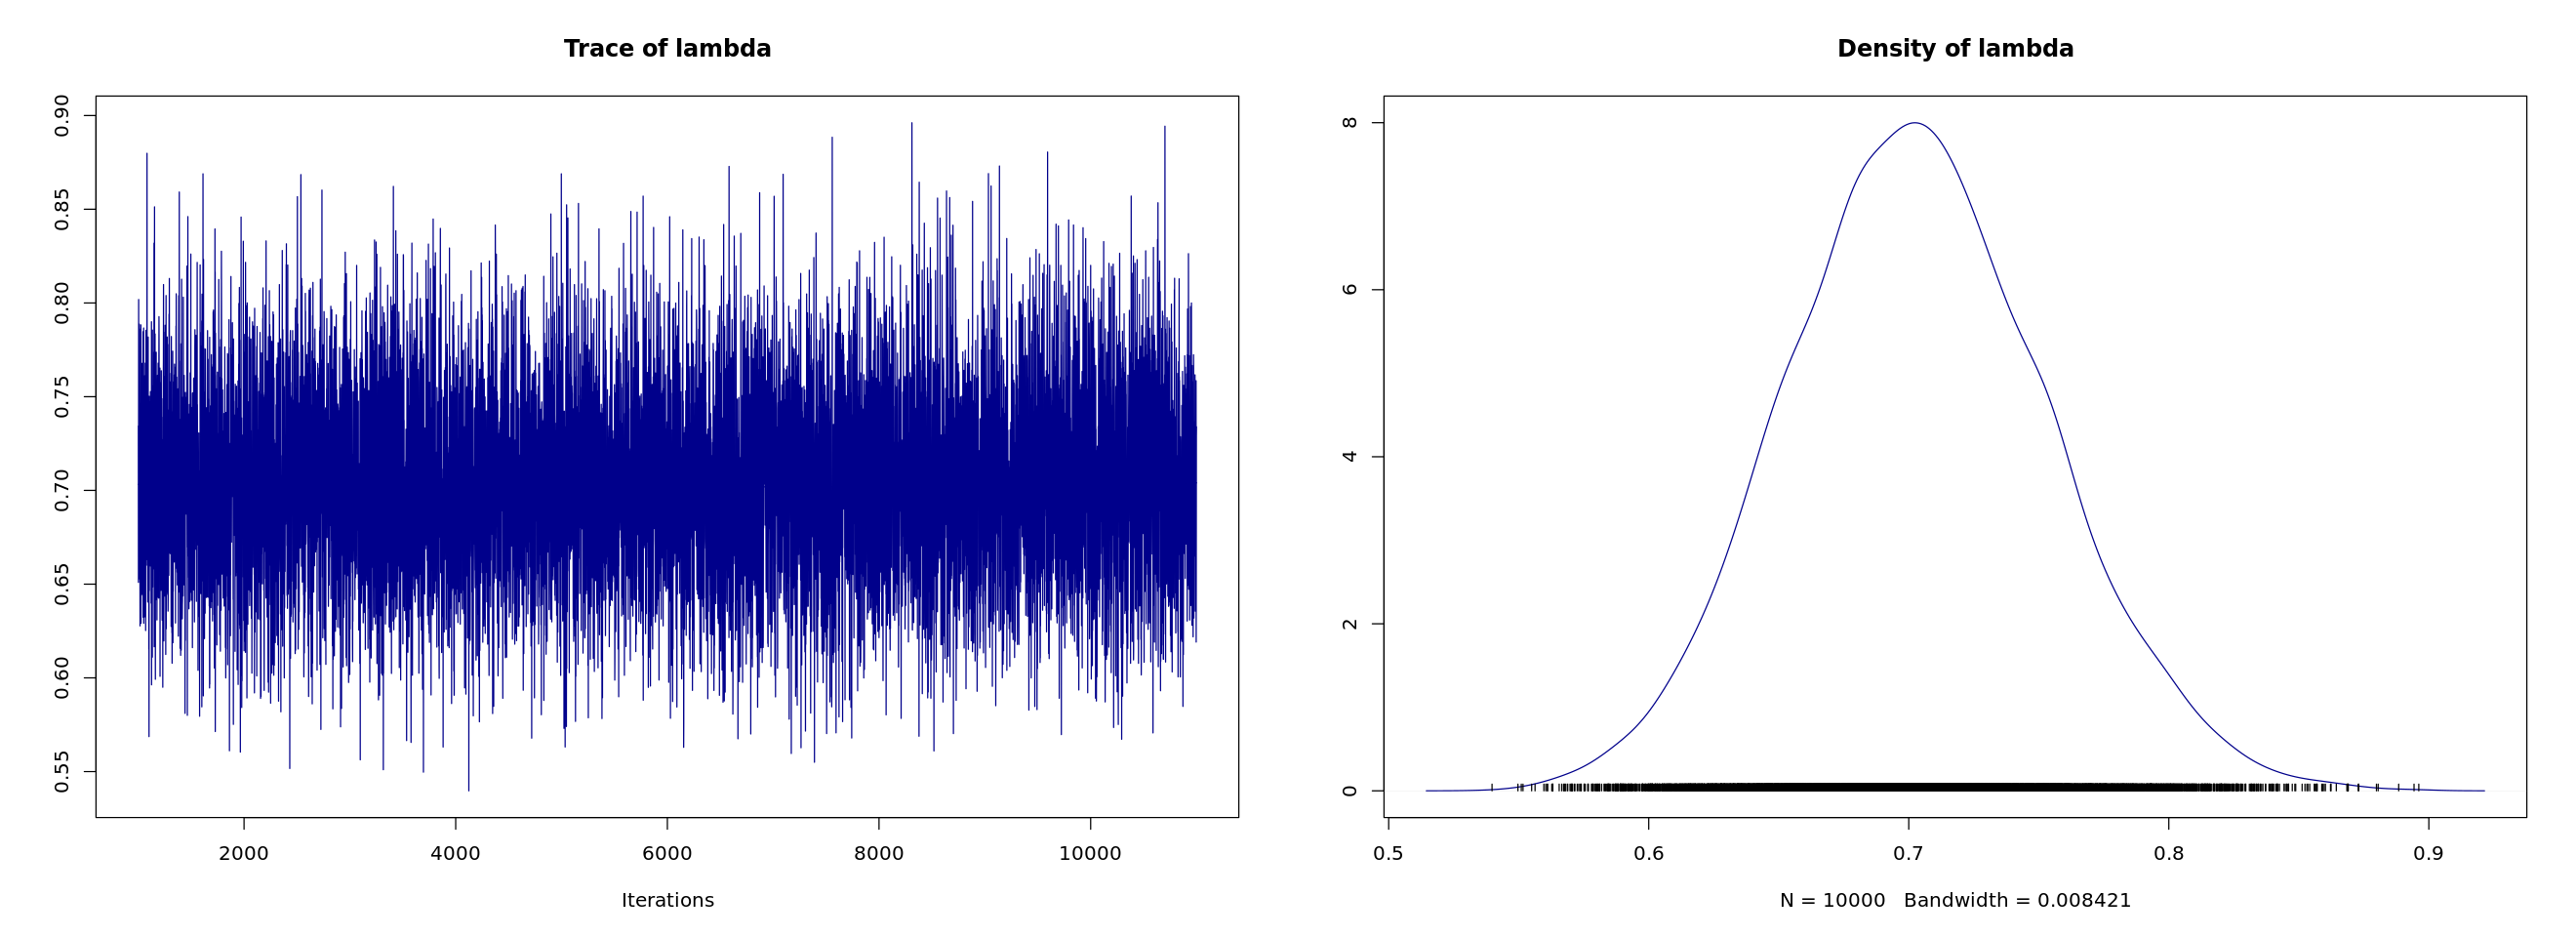

In [209]:
plot(mc, col="dark blue")

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="ex6"></a>

## Exercise 6: MCMC with JAGS - Water quality of streams

In [237]:
n <- 116
y <- 11 
p <- y/n

data <- NULL
data$X <- y
data$n <- n
data$n_new <- 10

In [238]:
#write the model for JAGS to use
cat("model {
    # Likelihood
    X ~ dbin(p, n);

    # Uniform prior 
    p ~ dbeta(1,10);

    #prediction from p
    y ~  dbin(p, n_new);

}" 
,file="HW6_EX6_water_quality.bug")

In [239]:
j_model <- jags.model("HW6_EX6_water_quality.bug", data)
update(j_model, 1000)
mc <- coda.samples(j_model, c("p", "y"), n.iter = 10000)
print(summary(chain))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
p 0.09413 0.02563 0.0002563      0.0003385
y 0.92540 0.94315 0.0094315      0.0096740

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
p 0.05006 0.07593 0.09197 0.1101 0.1481
y 0.00000 0.00000 1.00000 1.0000 3.0000



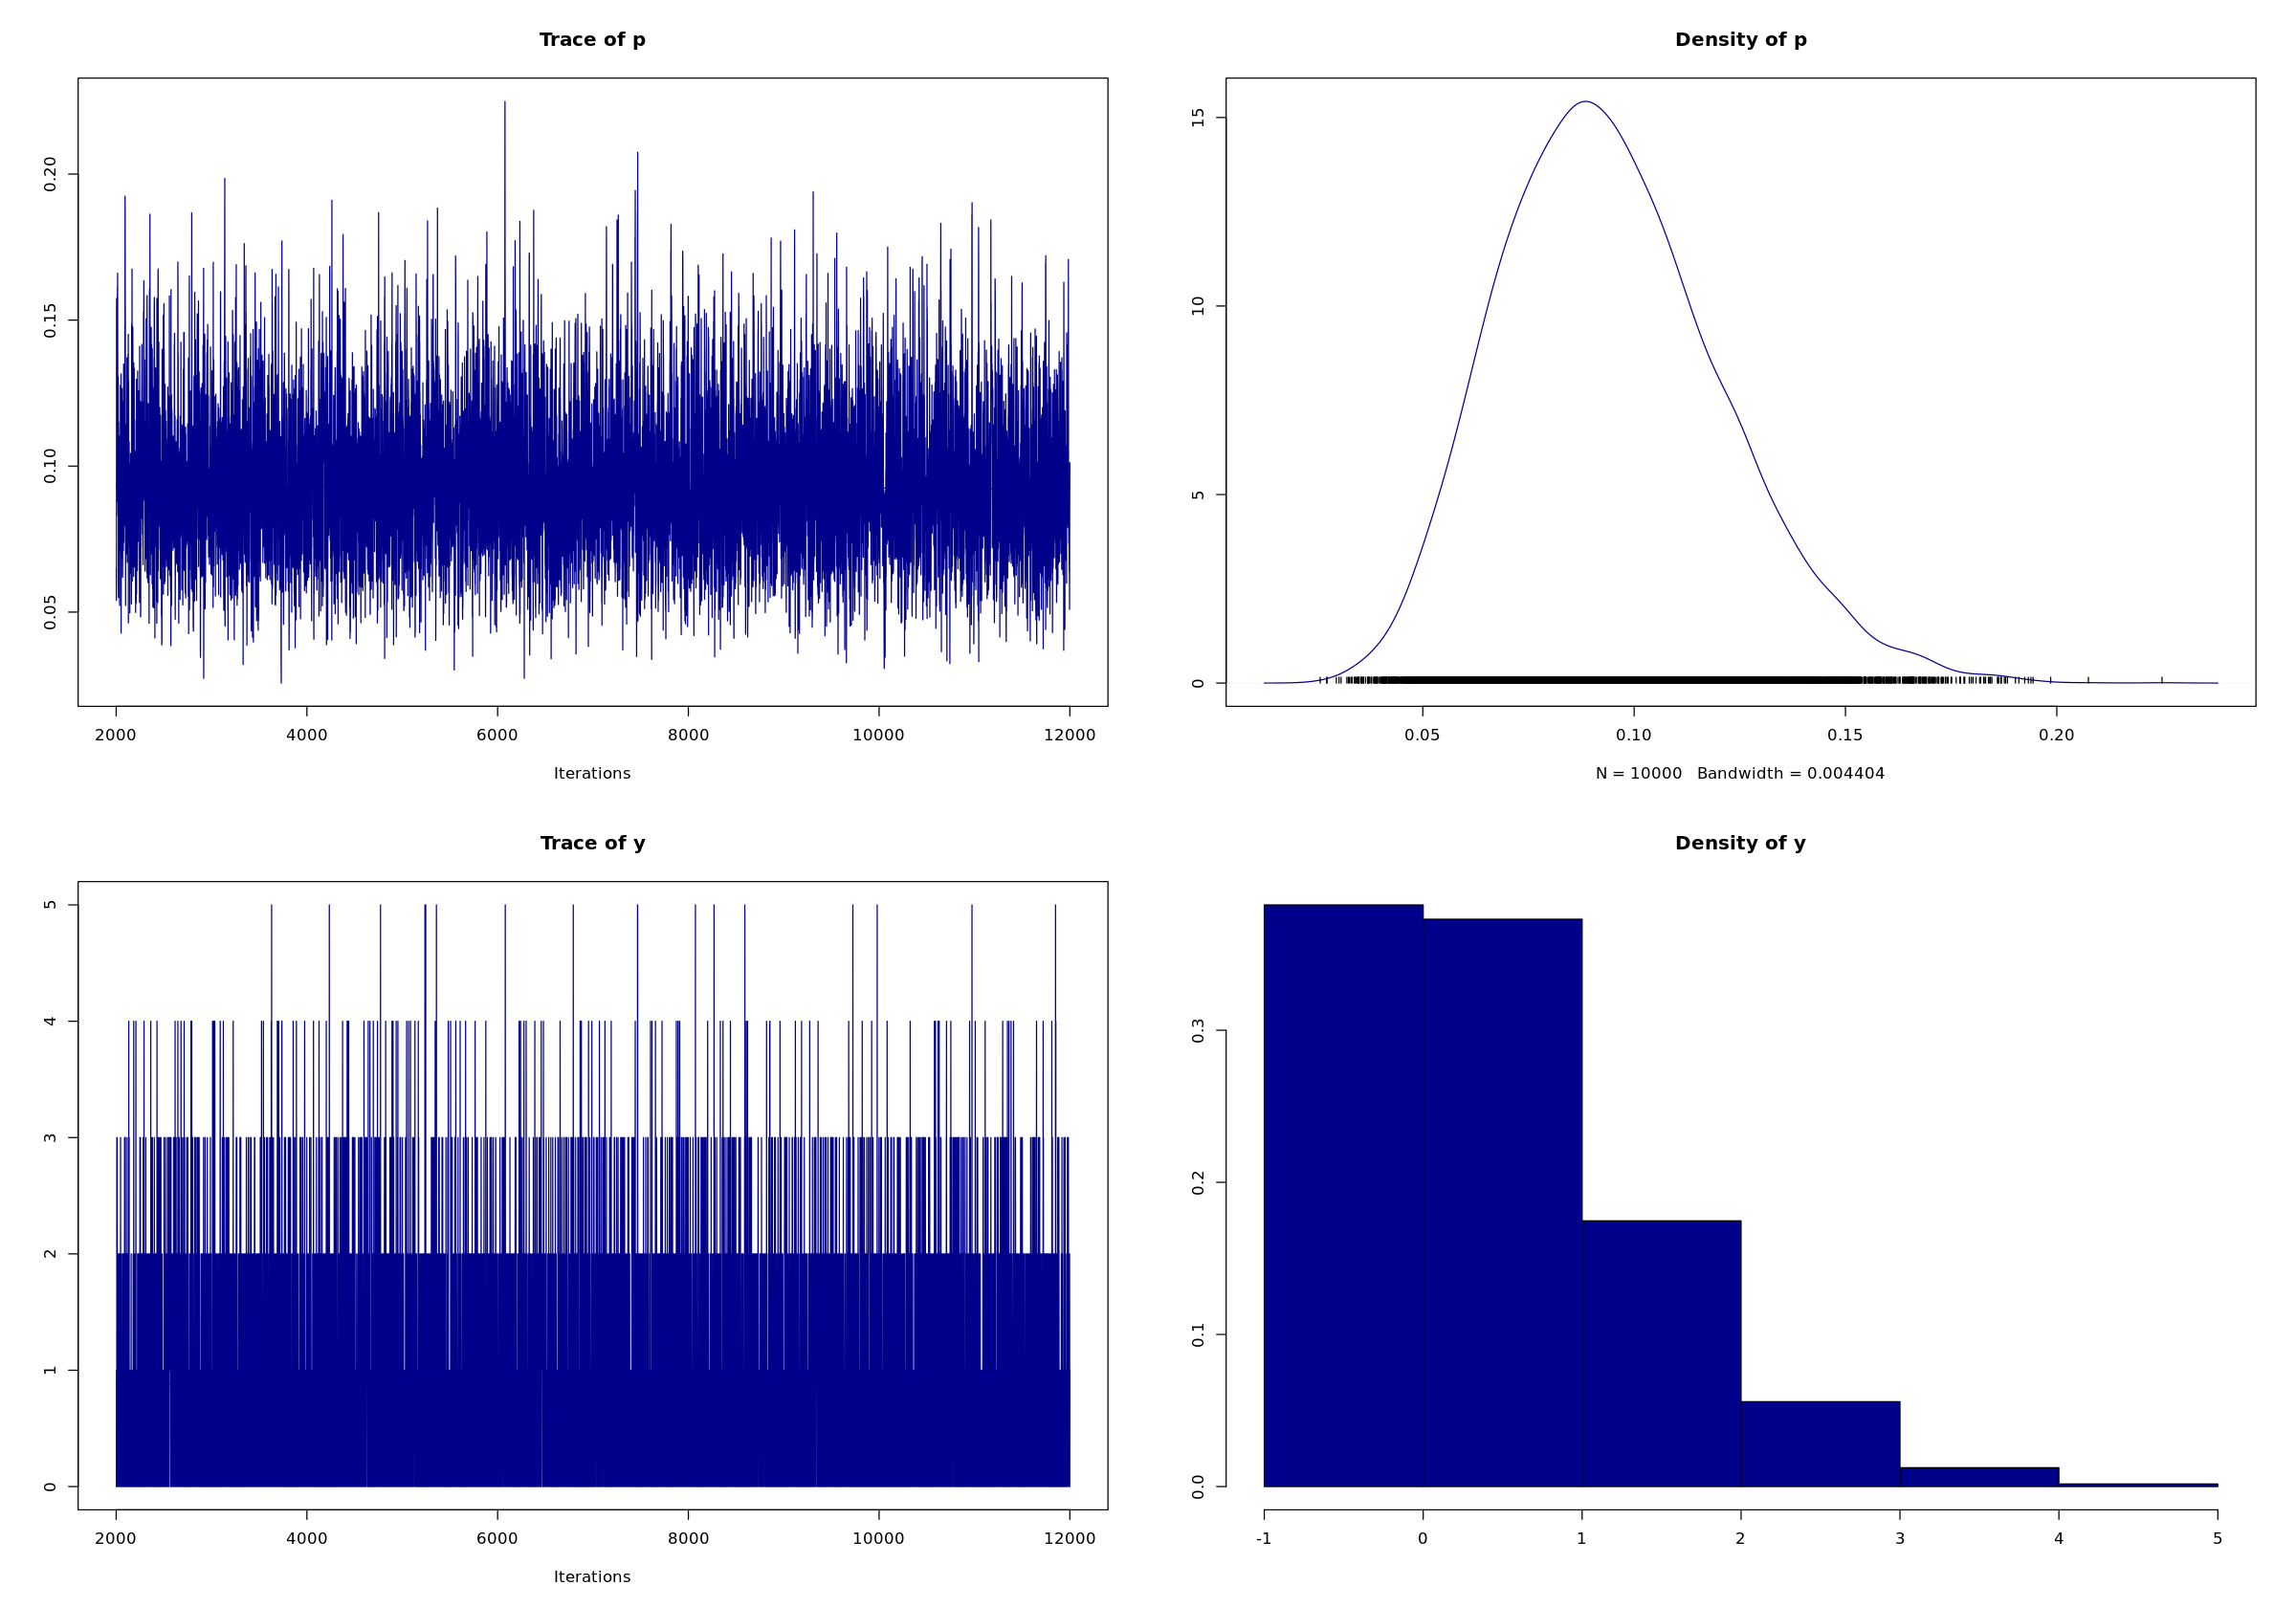

In [240]:
plot(mc, col="dark blue")

Most frequent p, bayseian estimator of the p-value, =  0.0875

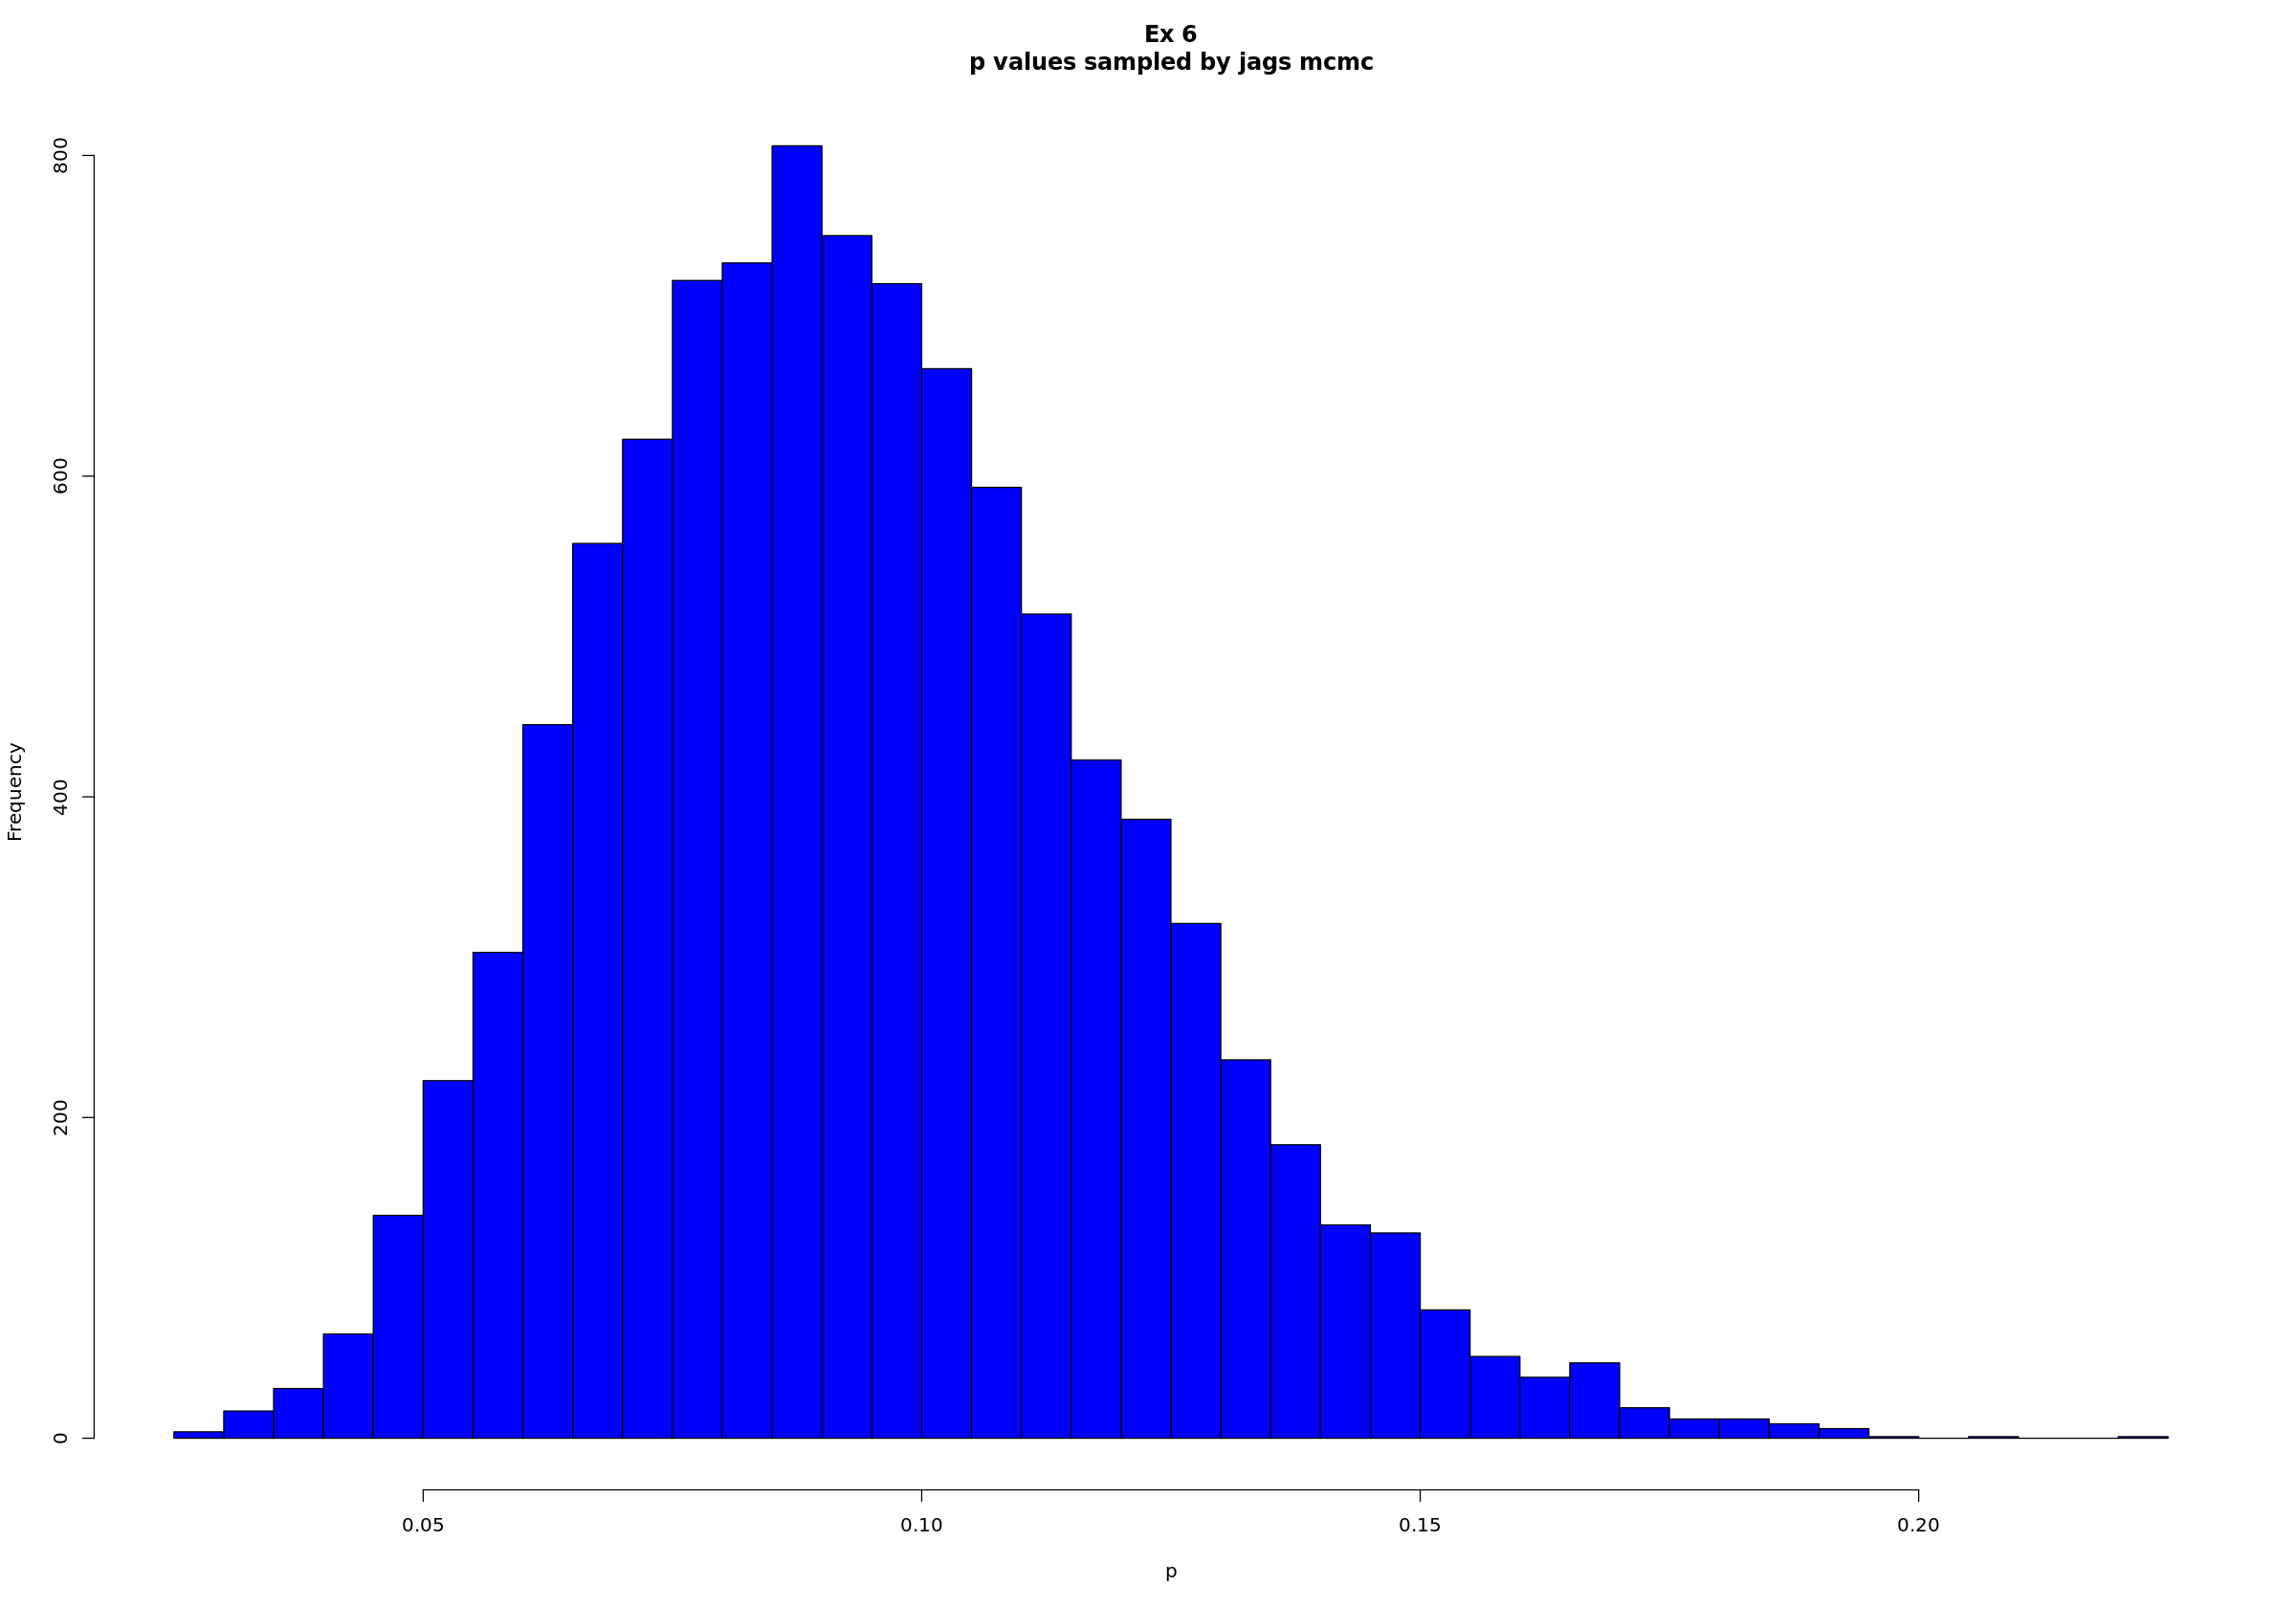

In [246]:
df <- as.data.frame( as.mcmc(mc))
mc_hist <- hist(df$p, breaks = 70, main = 'Ex 6\np values sampled by jags mcmc', xlab = 'p', col = "blue")
cat('Most frequent p, bayseian estimator of the p-value, = ',mc_hist$mids[which.max(mc_hist$counts)])